<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/probst/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [26]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  0.9241188
iter:  1 cost:  0.92180204
iter:  2 cost:  0.91949046
iter:  3 cost:  0.91718405
iter:  4 cost:  0.9148828
iter:  5 cost:  0.9125868
iter:  6 cost:  0.9102963
iter:  7 cost:  0.9080113
iter:  8 cost:  0.905732
iter:  9 cost:  0.903458
predicted  [[ 2.1420655  -0.16320108  0.97815394 -0.61406296]
 [ 2.3224494  -0.75284594  0.69296044 -0.29047087]
 [ 1.840398   -0.01532849  1.0181085  -0.17265338]
 [ 0.74564856 -0.0317089   0.35932684 -0.21758787]
 [ 1.1259717  -0.0331801   0.54271185 -0.37944838]
 [ 1.4127814  -1.1874304  -0.20380998 -0.41268682]
 [ 2.7916145  -0.7642427   0.8765191  -0.64662266]
 [ 2.4582217  -0.8365494   0.69756246 -0.32867402]
 [ 1.5414133   0.66556513  1.3408258  -0.34124732]
 [ 0.38158932  0.19979657  0.34743574 -0.13782519]]
real  [[0.38102187 0.12987082 0.57563307 0.10019394]
 [0.14484417 0.53803999 0.82036236 0.25167207]
 [0.35437646 0.64081185 0.41850736 0.31271781]
 [0.69902837 0.79558025 0.29179376 0.90501162]
 [0.47767715 0.41910042

In [27]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  0.63123596
iter:  1 cost:  0.6297682
iter:  2 cost:  0.62830436
iter:  3 cost:  0.62684476
iter:  4 cost:  0.6253892
iter:  5 cost:  0.62393785
iter:  6 cost:  0.62249076
iter:  7 cost:  0.62104785
iter:  8 cost:  0.6196092
iter:  9 cost:  0.6181747
predicted  [[ 2.0356863e+00  1.4722053e+00 -6.1605030e-01  5.5126244e-01]
 [ 4.1666463e-01  1.0008370e-03 -3.5379615e-01 -4.9070215e-01]
 [-7.4719839e-02  1.4264111e-01  3.8366720e-02 -1.0310203e+00]
 [ 7.2316343e-01  5.3985679e-01 -2.0988820e-01  1.8936744e-01]
 [ 1.3470900e+00  9.9489826e-01 -3.8513884e-01  4.7849479e-01]
 [ 1.5919878e+00  3.7374079e-01 -8.5388881e-01  1.1608559e+00]
 [ 1.9815145e+00  1.0833502e+00 -8.0187345e-01  4.9704239e-01]
 [ 5.5634576e-01  4.9564548e-02 -4.2144355e-01 -4.0654546e-01]
 [ 8.0214584e-01  1.1726272e+00  1.9759892e-02 -5.6066591e-01]
 [ 4.6220225e-01  4.9001339e-01 -5.8685366e-02  4.9156629e-02]]
real  [[0.38102187 0.12987082 0.57563307 0.10019394]
 [0.14484417 0.53803999 0.82036236 0.25

In [28]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4

num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  3.158643
iter:  1 cost:  3.1318593
iter:  2 cost:  3.1052718
iter:  3 cost:  3.0788817
iter:  4 cost:  3.0526917
iter:  5 cost:  3.026704
iter:  6 cost:  3.0009198
iter:  7 cost:  2.9753413
iter:  8 cost:  2.9499695
iter:  9 cost:  2.9248044
predicted  [[3.700018   0.40783572 1.5275744  0.48682606]
 [3.8312387  0.2860548  1.6670904  0.6026707 ]
 [3.7999845  0.33673024 1.5885813  0.53154165]
 [3.8247805  0.31383395 1.6127578  0.54237455]
 [3.7974253  0.3261127  1.6167316  0.6126163 ]
 [3.7690053  0.35386133 1.5873423  0.59337556]
 [3.7961507  0.33054543 1.6122086  0.5771273 ]
 [3.6666765  0.44310373 1.4769012  0.4526629 ]
 [3.7953959  0.31598845 1.6388751  0.58473   ]
 [3.7357483  0.38802427 1.5476191  0.5208248 ]]
real  [[0.5283375  0.72665062 0.51614854 0.66535612]
 [0.76286502 0.1701751  0.89708903 0.69899818]
 [0.44583788 0.09237725 0.33319238 0.63928334]
 [0.77736373 0.44734369 0.99275633 0.45196724]
 [0.44024536 0.57019672 0.64434337 0.53810777]
 [0.84585472 0.6415

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [30]:
# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# training data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)




    

iter:  0 train_cost:  9.109221 train_acc:  0.0625 test_cost:  8.241816 test_acc:  0.0859375
iter:  1 train_cost:  7.318471 train_acc:  0.125 test_cost:  8.4735775 test_acc:  0.0859375
iter:  2 train_cost:  7.935665 train_acc:  0.109375 test_cost:  7.7256794 test_acc:  0.0703125
iter:  3 train_cost:  8.437762 train_acc:  0.09375 test_cost:  7.2232556 test_acc:  0.0703125
iter:  4 train_cost:  8.003223 train_acc:  0.0703125 test_cost:  7.3021827 test_acc:  0.1328125
iter:  5 train_cost:  6.3200793 train_acc:  0.125 test_cost:  7.220077 test_acc:  0.0703125
iter:  6 train_cost:  6.158122 train_acc:  0.140625 test_cost:  7.2004976 test_acc:  0.09375
iter:  7 train_cost:  7.2867746 train_acc:  0.078125 test_cost:  7.4583206 test_acc:  0.1171875
iter:  8 train_cost:  7.034344 train_acc:  0.0625 test_cost:  6.5167046 test_acc:  0.140625
iter:  9 train_cost:  6.556006 train_acc:  0.171875 test_cost:  6.4543314 test_acc:  0.0859375
iter:  10 train_cost:  6.344569 train_acc:  0.125 test_cost:  6

In [0]:
import tensorflow as tf 


def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)




Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

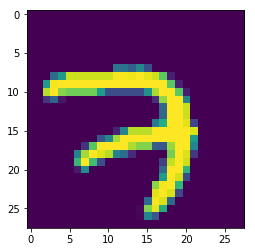

In [8]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

mnist.train.images.shape

image =mnist.train.images[0].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

mnist.train.labels[0]

# CNN using Tensorflow




conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
(64, 1024)


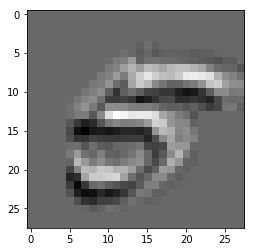

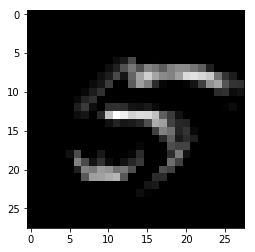

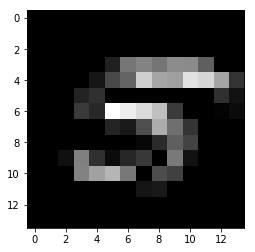

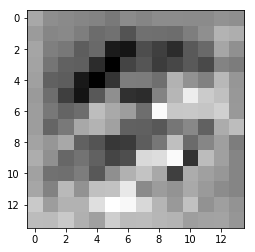

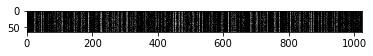

iter:  0 train_cost:  44823.727 train_acc:  0.171875 test_cost:  41855.656 test_acc:  0.171875 num_of_returned_sensors: 7
(64, 1024)


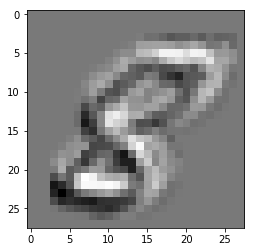

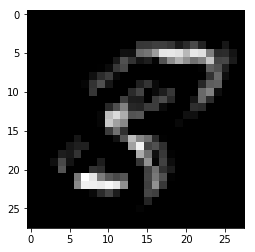

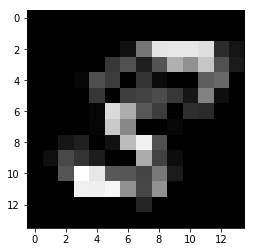

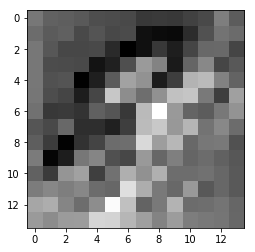

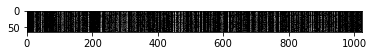

iter:  100 train_cost:  475.87207 train_acc:  0.921875 test_cost:  1360.895 test_acc:  0.90625 num_of_returned_sensors: 7
(64, 1024)


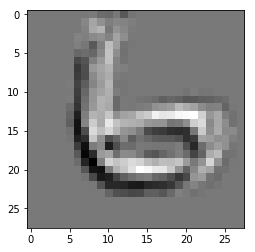

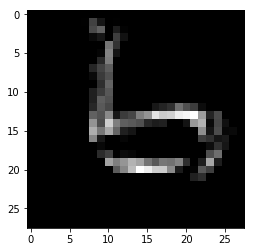

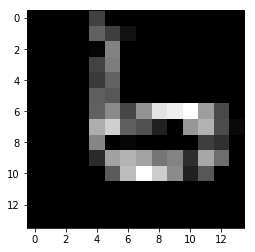

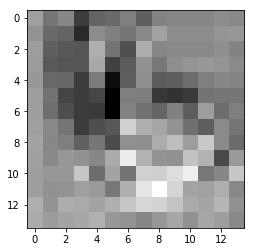

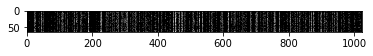

iter:  200 train_cost:  564.534 train_acc:  0.953125 test_cost:  1534.0339 test_acc:  0.84375 num_of_returned_sensors: 7
(64, 1024)


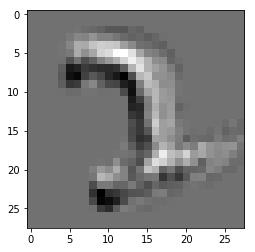

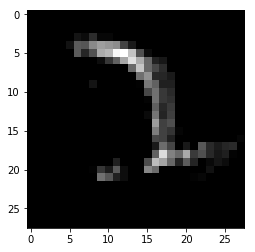

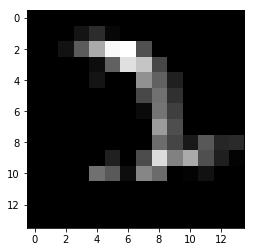

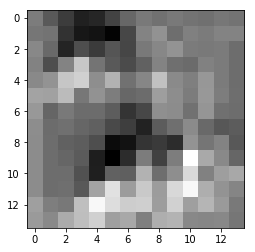

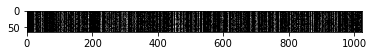

iter:  300 train_cost:  532.70105 train_acc:  0.921875 test_cost:  802.23065 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


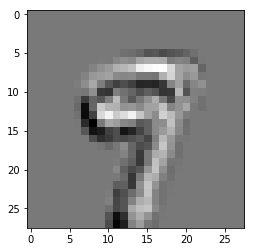

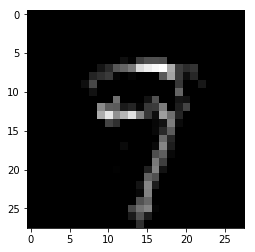

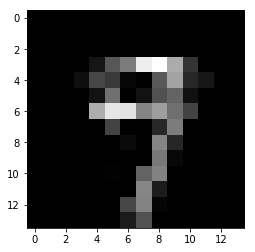

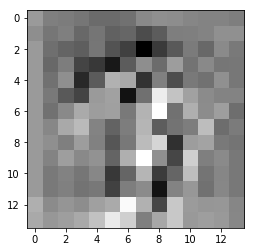

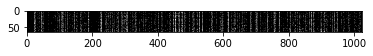

iter:  400 train_cost:  517.21423 train_acc:  0.921875 test_cost:  347.01337 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


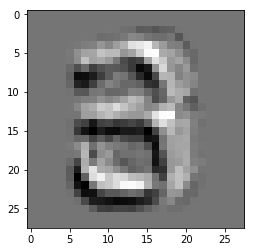

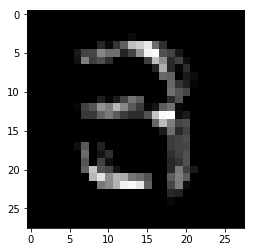

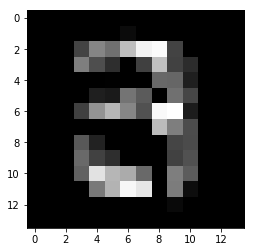

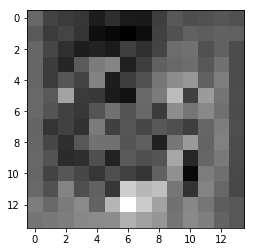

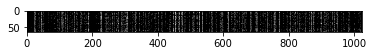

iter:  500 train_cost:  97.32309 train_acc:  0.96875 test_cost:  52.890656 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


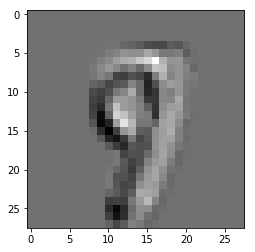

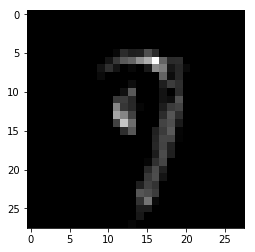

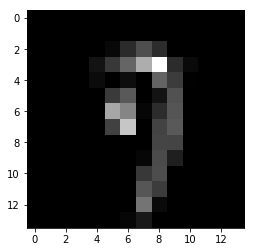

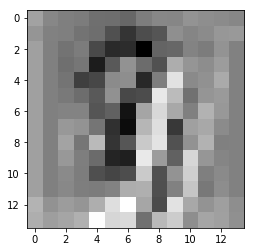

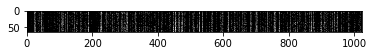

iter:  600 train_cost:  655.17725 train_acc:  0.96875 test_cost:  827.7074 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


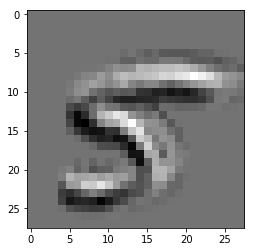

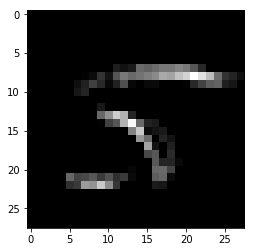

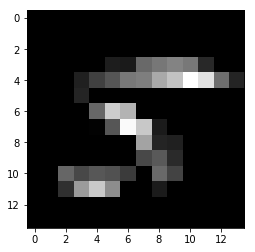

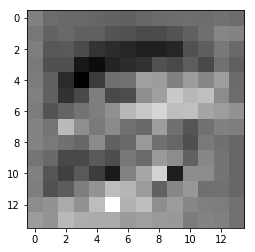

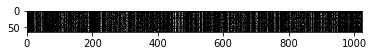

iter:  700 train_cost:  187.89505 train_acc:  0.96875 test_cost:  377.7994 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


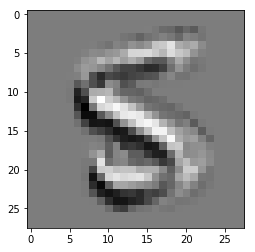

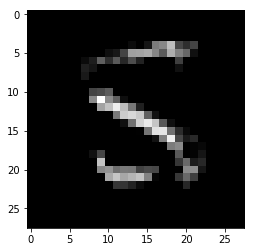

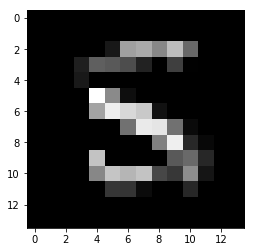

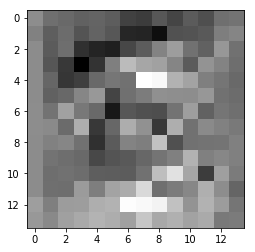

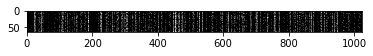

iter:  800 train_cost:  848.6141 train_acc:  0.921875 test_cost:  912.3178 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


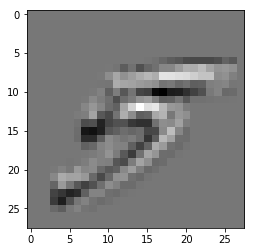

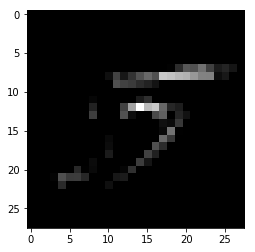

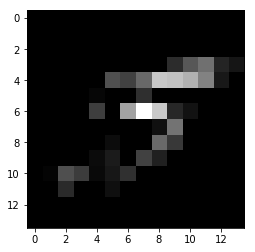

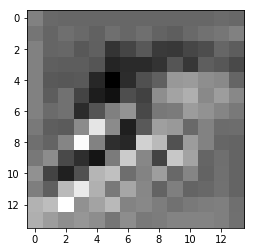

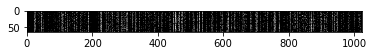

iter:  900 train_cost:  145.46616 train_acc:  0.96875 test_cost:  1317.9247 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


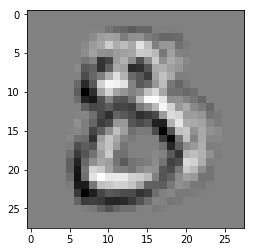

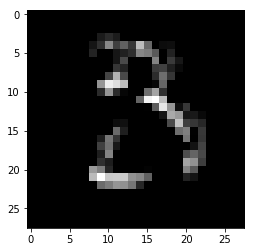

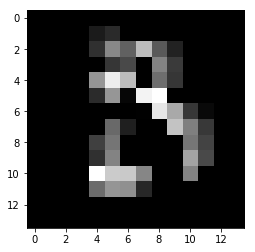

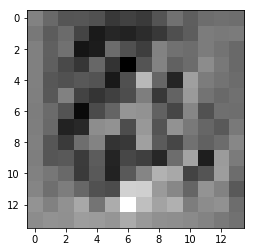

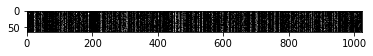

iter:  1000 train_cost:  175.09073 train_acc:  0.984375 test_cost:  386.67273 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


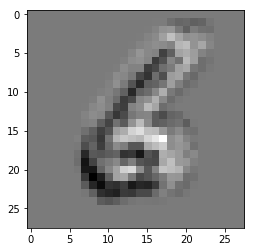

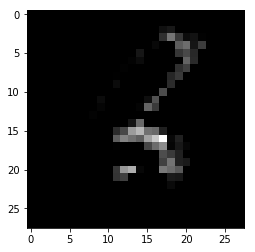

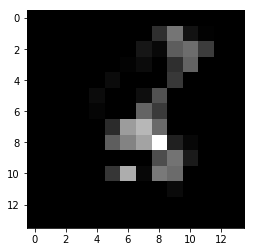

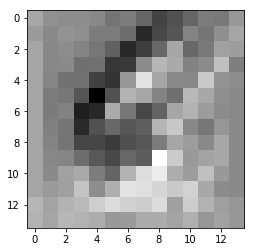

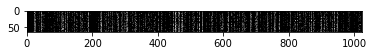

iter:  1100 train_cost:  0.0 train_acc:  1.0 test_cost:  376.19547 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


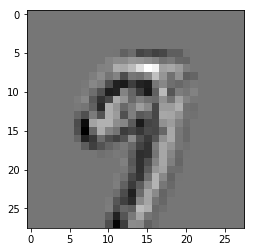

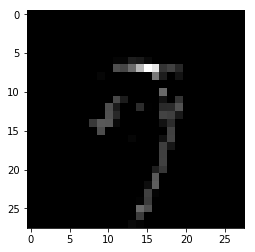

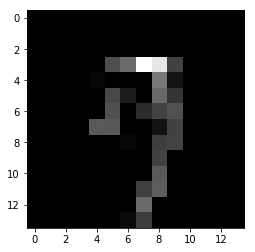

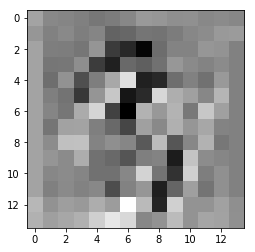

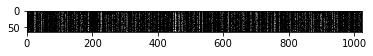

iter:  1200 train_cost:  379.0205 train_acc:  0.9375 test_cost:  415.72418 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


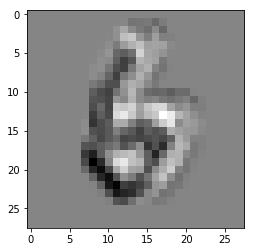

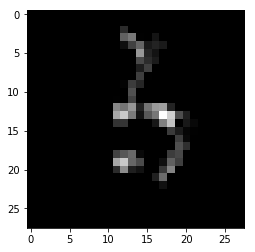

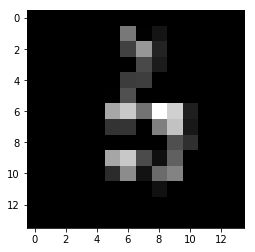

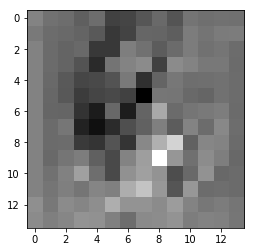

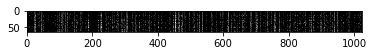

iter:  1300 train_cost:  131.08537 train_acc:  0.984375 test_cost:  348.02792 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


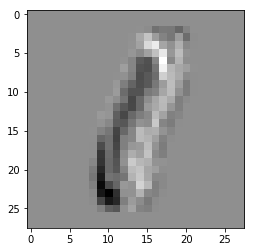

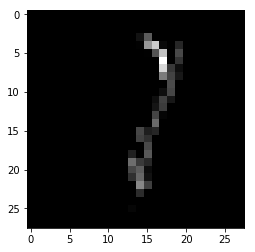

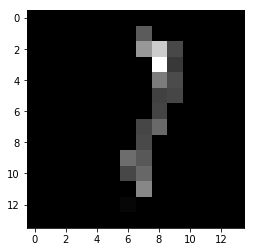

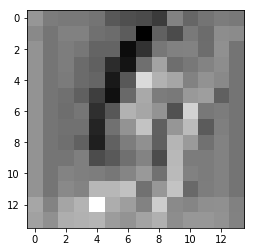

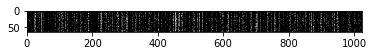

iter:  1400 train_cost:  153.52415 train_acc:  0.96875 test_cost:  463.95105 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


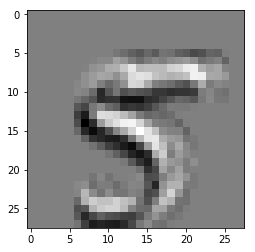

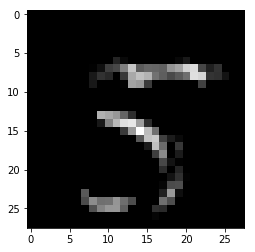

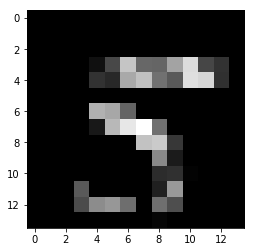

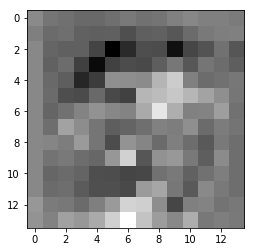

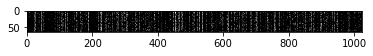

iter:  1500 train_cost:  203.6793 train_acc:  0.984375 test_cost:  257.56107 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


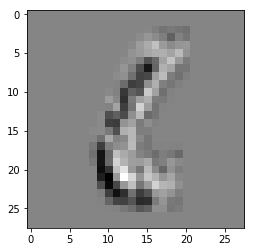

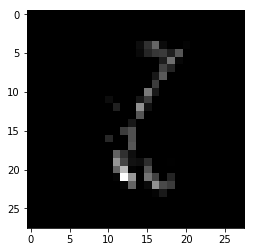

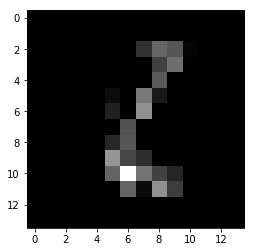

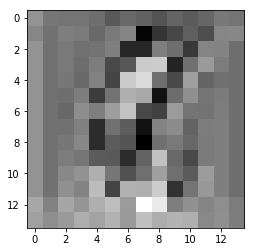

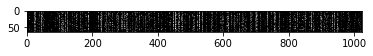

iter:  1600 train_cost:  122.011536 train_acc:  0.96875 test_cost:  317.85867 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


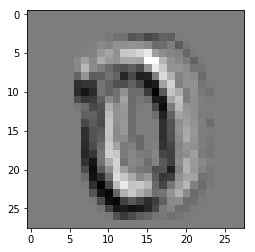

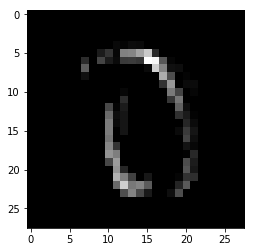

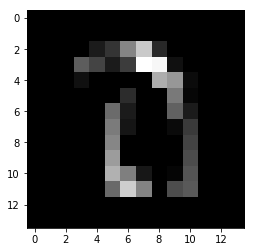

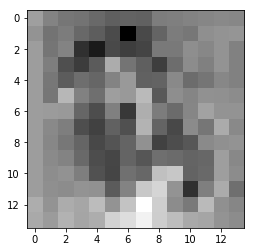

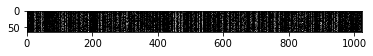

iter:  1700 train_cost:  159.70583 train_acc:  0.953125 test_cost:  222.14119 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


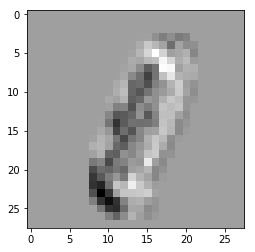

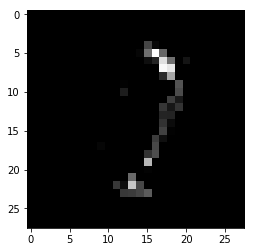

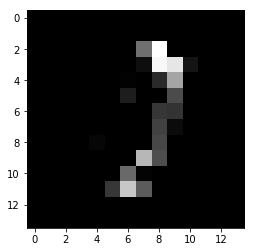

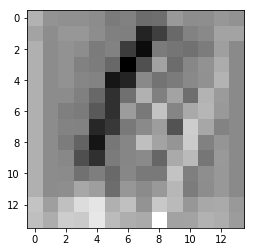

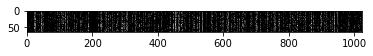

iter:  1800 train_cost:  86.73517 train_acc:  0.953125 test_cost:  4.7565765 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


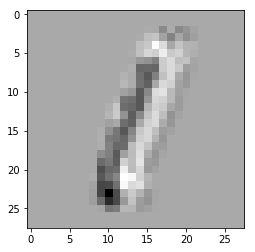

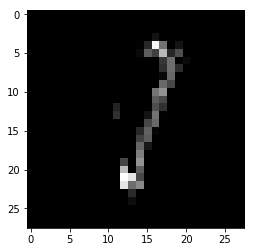

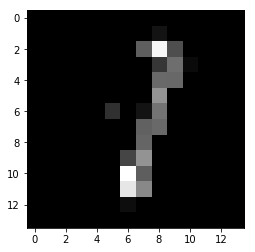

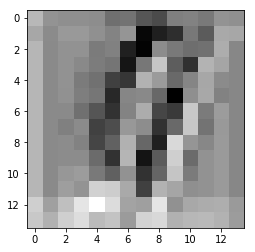

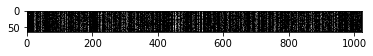

iter:  1900 train_cost:  91.79886 train_acc:  0.984375 test_cost:  16.638626 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


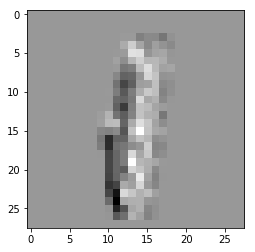

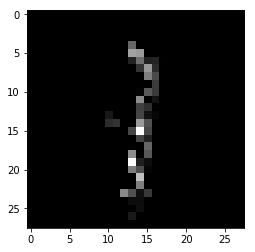

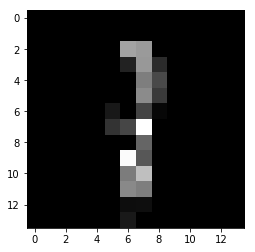

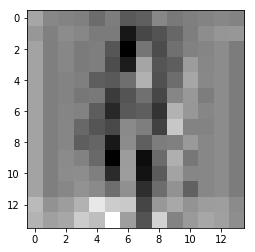

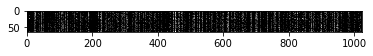

iter:  2000 train_cost:  176.11679 train_acc:  0.96875 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


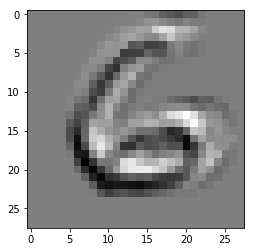

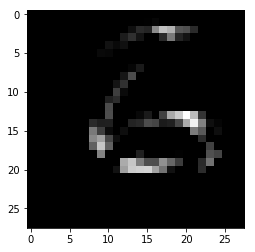

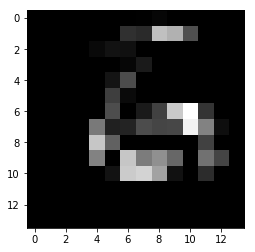

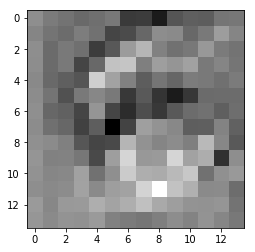

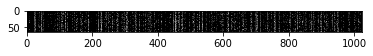

iter:  2100 train_cost:  0.0 train_acc:  1.0 test_cost:  10.712326 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


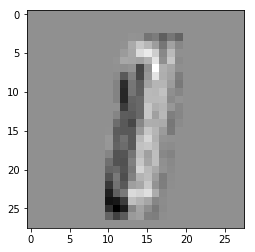

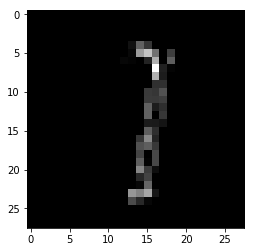

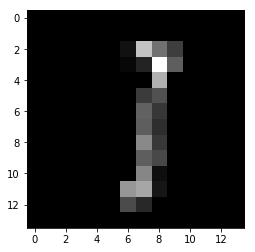

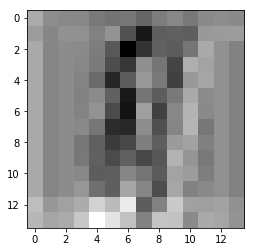

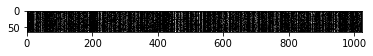

iter:  2200 train_cost:  0.0 train_acc:  1.0 test_cost:  283.52112 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


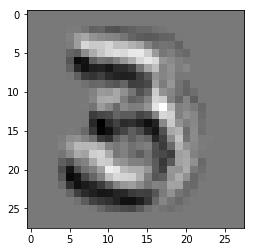

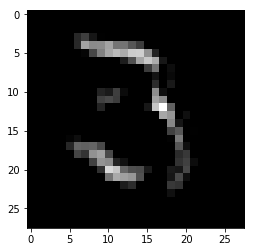

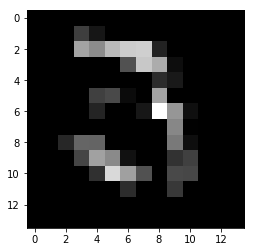

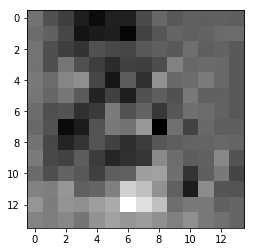

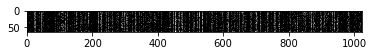

iter:  2300 train_cost:  139.84143 train_acc:  0.984375 test_cost:  119.02237 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


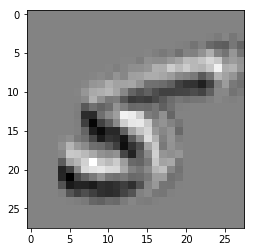

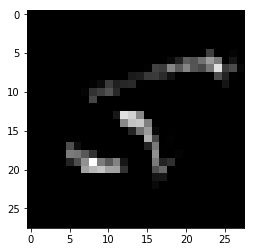

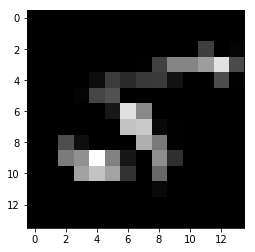

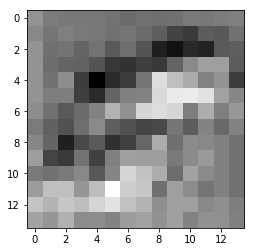

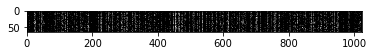

iter:  2400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


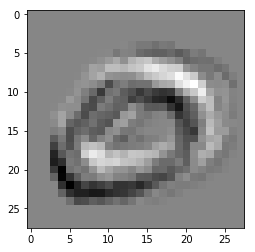

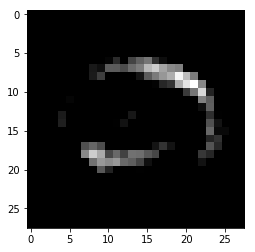

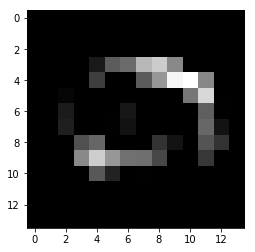

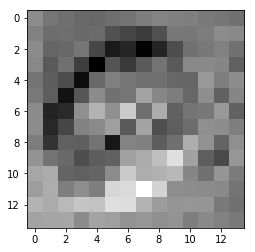

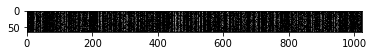

iter:  2500 train_cost:  136.5201 train_acc:  0.96875 test_cost:  339.17197 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


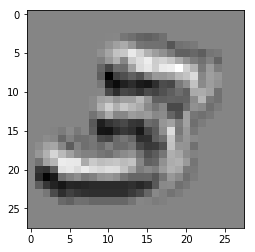

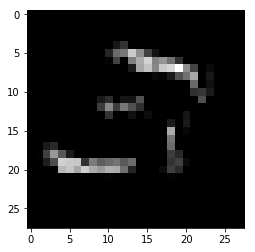

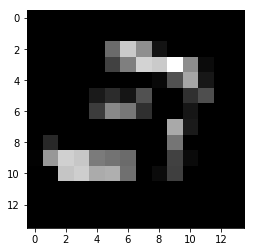

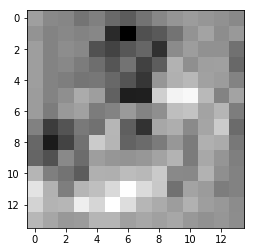

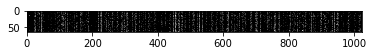

iter:  2600 train_cost:  11.905518 train_acc:  0.984375 test_cost:  22.118073 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


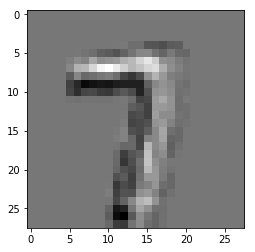

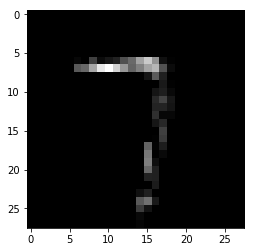

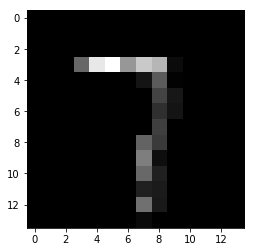

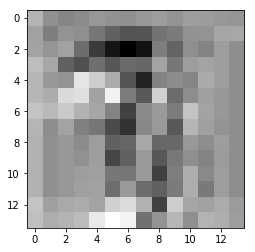

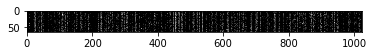

iter:  2700 train_cost:  12.78241 train_acc:  0.984375 test_cost:  9.4086 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


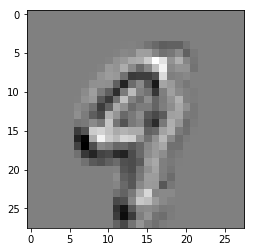

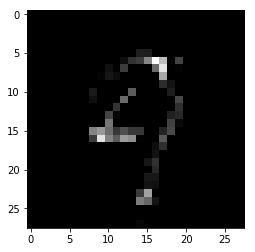

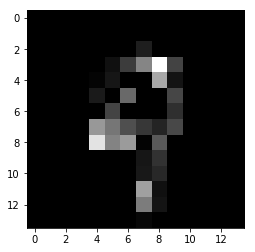

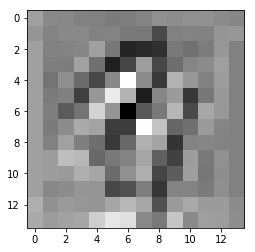

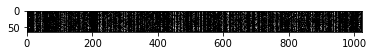

iter:  2800 train_cost:  0.0 train_acc:  1.0 test_cost:  66.00299 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


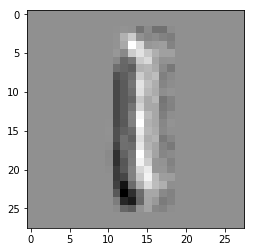

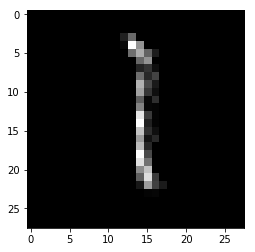

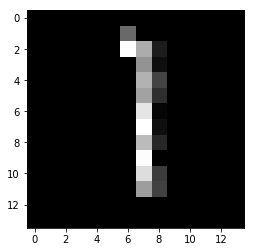

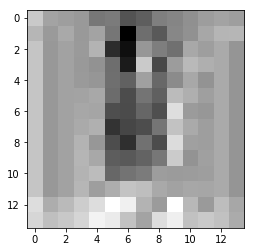

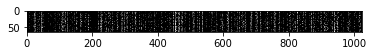

iter:  2900 train_cost:  0.0 train_acc:  1.0 test_cost:  50.13858 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


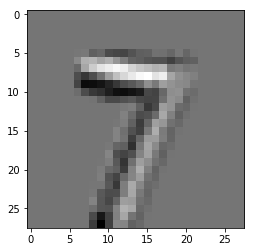

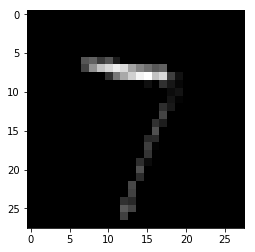

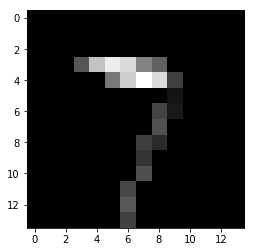

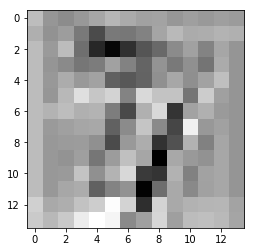

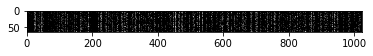

iter:  3000 train_cost:  70.747284 train_acc:  0.984375 test_cost:  274.52164 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


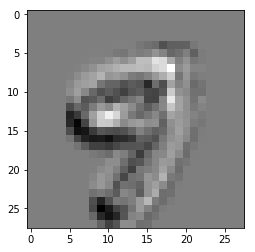

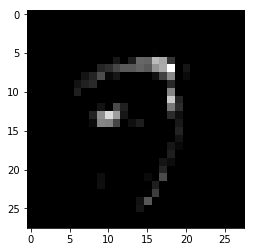

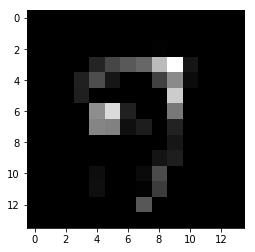

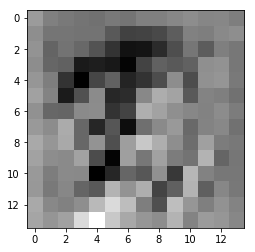

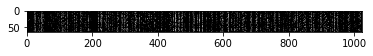

iter:  3100 train_cost:  62.28369 train_acc:  0.96875 test_cost:  333.7767 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


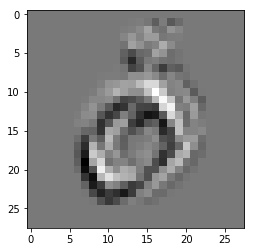

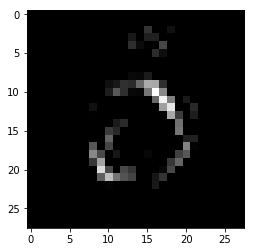

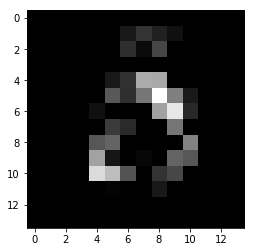

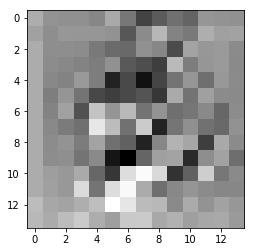

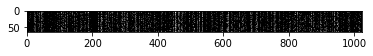

iter:  3200 train_cost:  54.501053 train_acc:  0.984375 test_cost:  83.52594 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


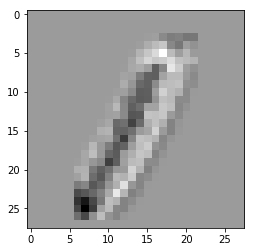

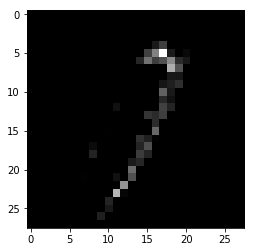

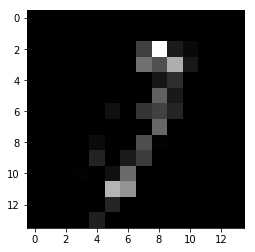

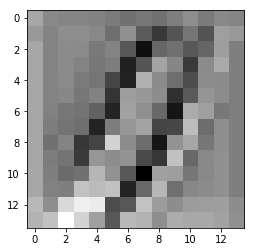

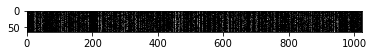

iter:  3300 train_cost:  4.425476 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


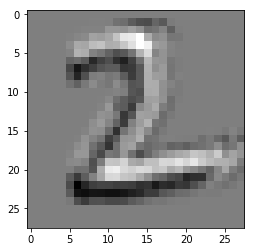

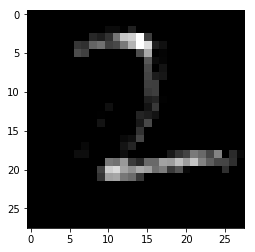

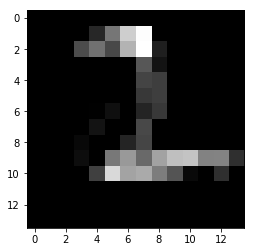

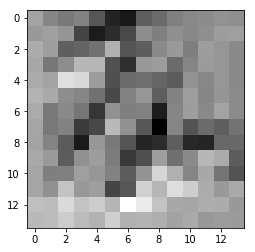

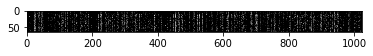

iter:  3400 train_cost:  0.0 train_acc:  1.0 test_cost:  253.46841 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


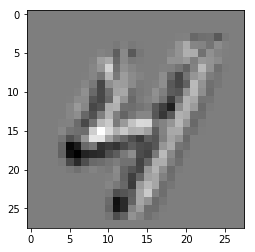

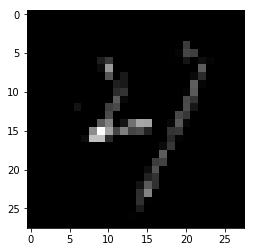

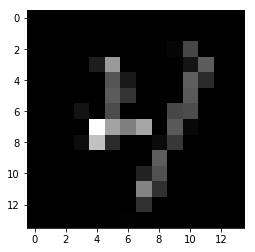

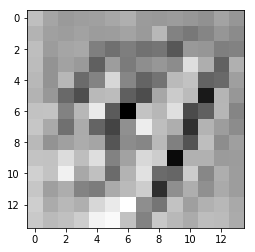

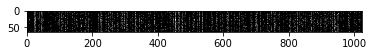

iter:  3500 train_cost:  0.0 train_acc:  1.0 test_cost:  3.9206543 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


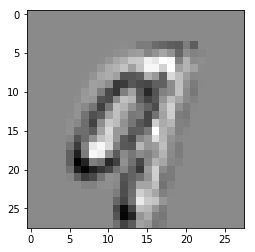

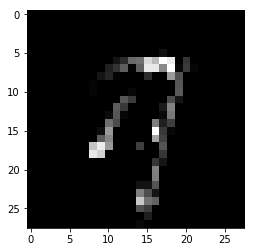

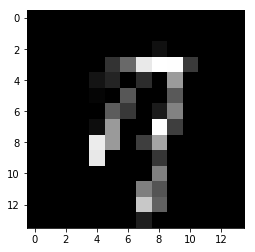

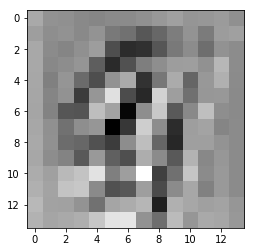

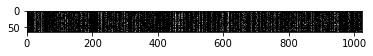

iter:  3600 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


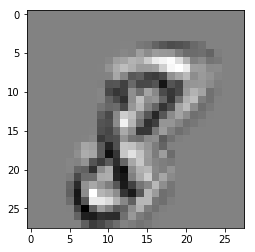

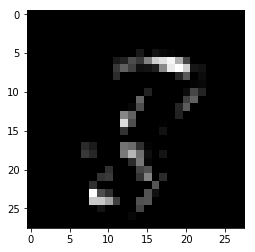

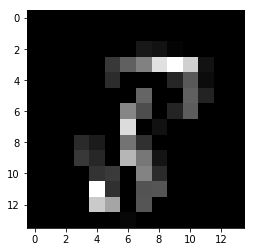

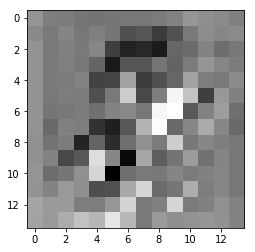

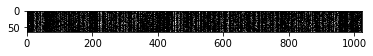

iter:  3700 train_cost:  25.574158 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


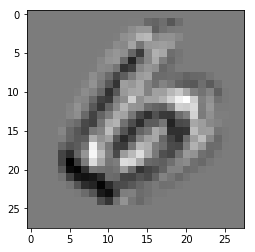

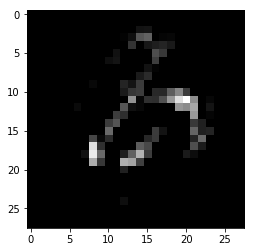

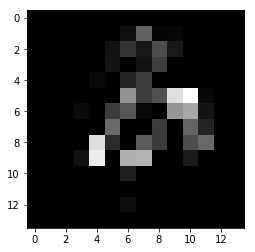

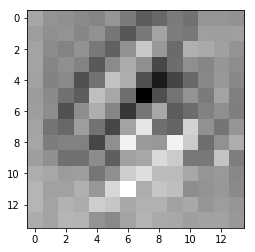

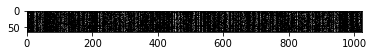

iter:  3800 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


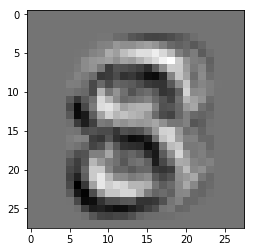

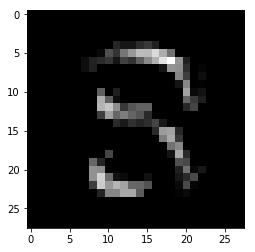

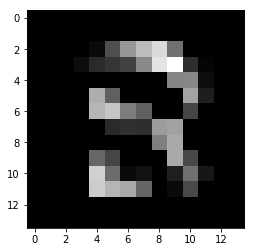

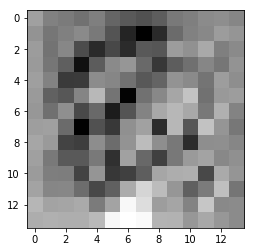

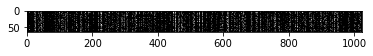

iter:  3900 train_cost:  9.585876 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


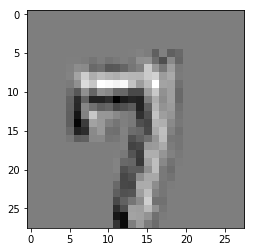

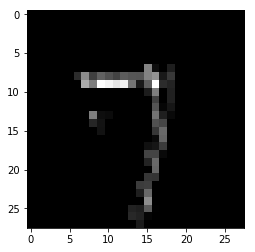

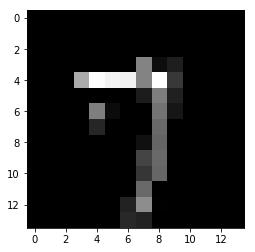

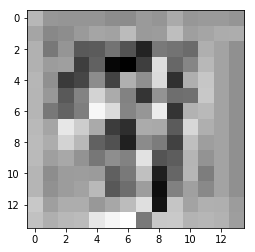

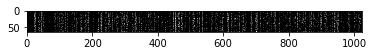

iter:  4000 train_cost:  107.78468 train_acc:  0.984375 test_cost:  72.72339 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


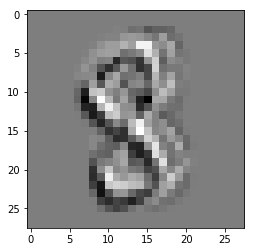

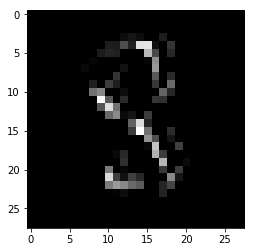

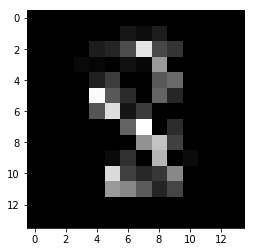

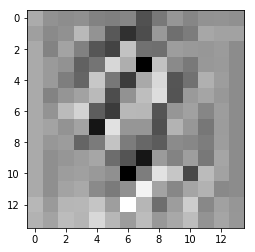

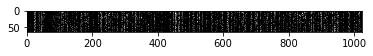

iter:  4100 train_cost:  59.53914 train_acc:  0.984375 test_cost:  64.26312 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


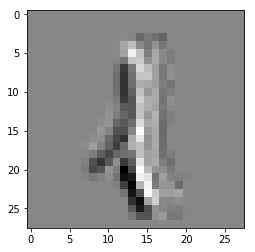

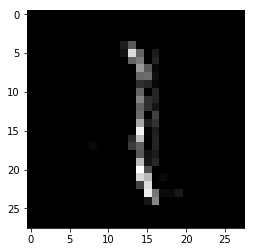

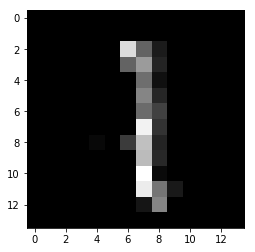

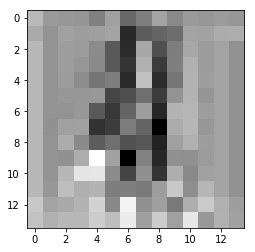

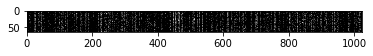

iter:  4200 train_cost:  57.47502 train_acc:  0.96875 test_cost:  28.060516 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


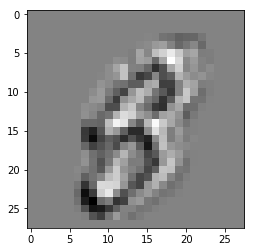

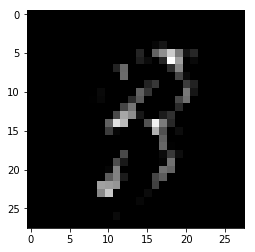

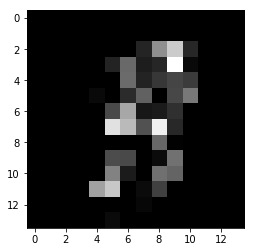

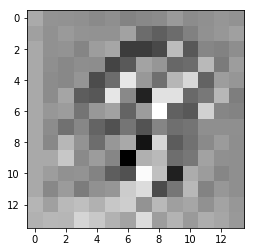

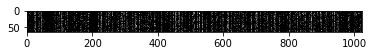

iter:  4300 train_cost:  32.96524 train_acc:  0.984375 test_cost:  63.882874 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


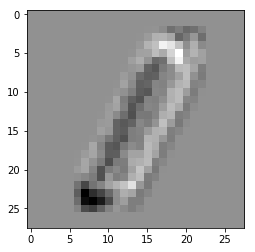

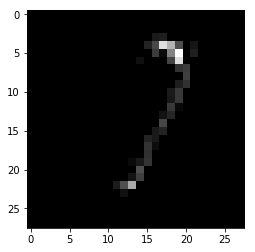

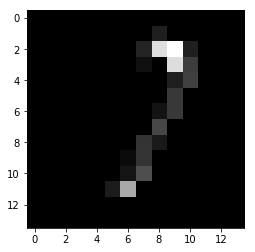

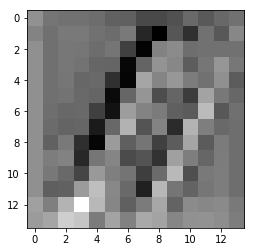

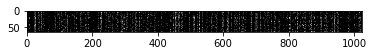

iter:  4400 train_cost:  0.0 train_acc:  1.0 test_cost:  157.18225 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


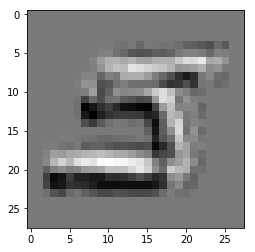

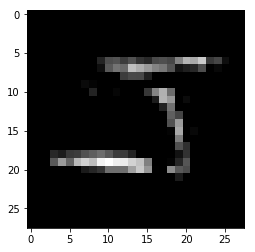

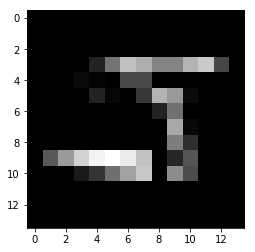

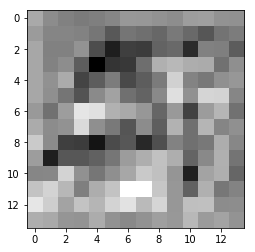

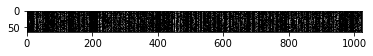

iter:  4500 train_cost:  0.0 train_acc:  1.0 test_cost:  21.12497 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


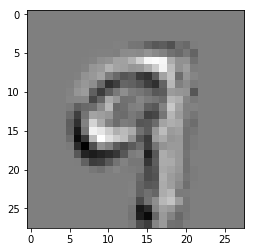

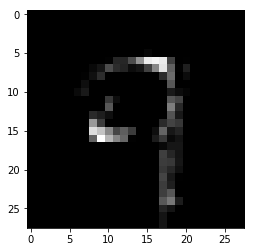

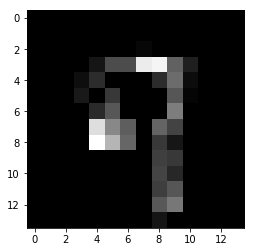

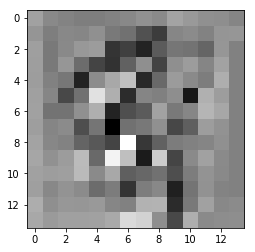

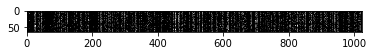

iter:  4600 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


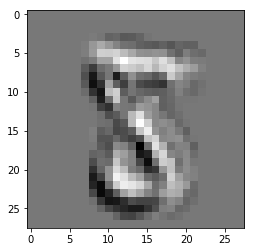

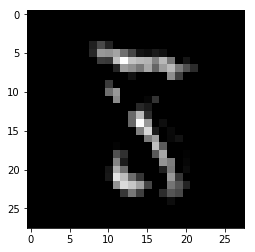

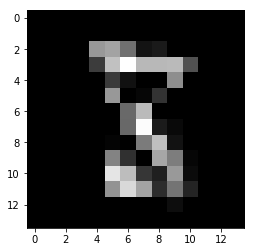

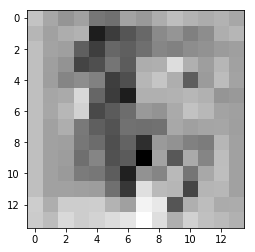

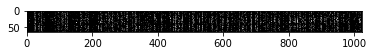

iter:  4700 train_cost:  0.0 train_acc:  1.0 test_cost:  352.34875 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


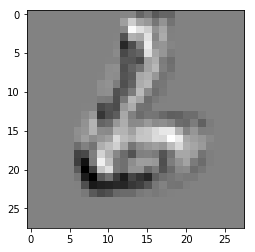

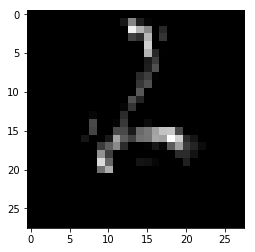

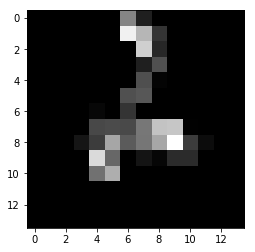

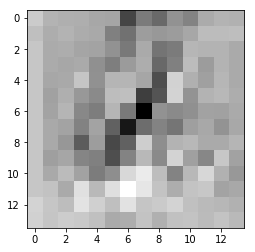

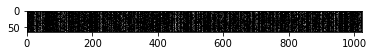

iter:  4800 train_cost:  0.0 train_acc:  1.0 test_cost:  137.91617 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


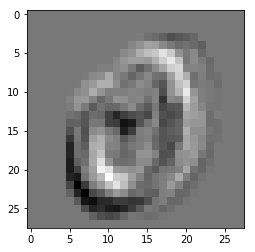

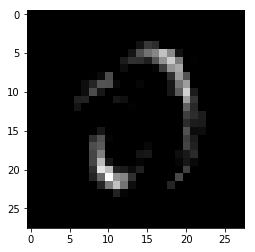

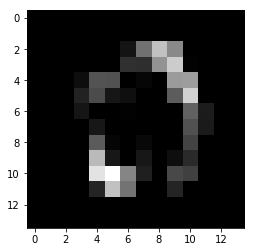

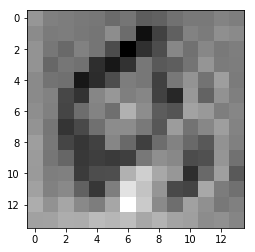

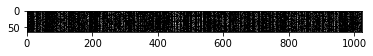

iter:  4900 train_cost:  0.9779968 train_acc:  0.984375 test_cost:  281.4062 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


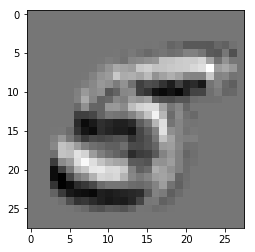

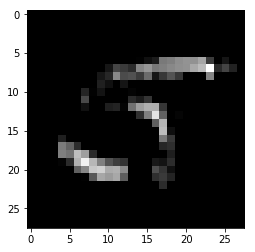

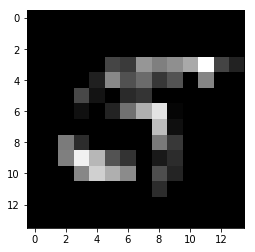

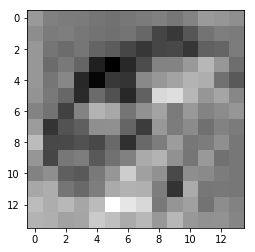

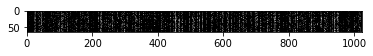

iter:  5000 train_cost:  0.0 train_acc:  1.0 test_cost:  168.73686 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


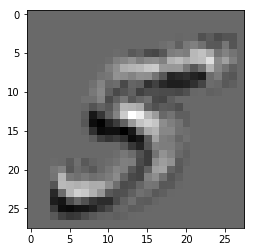

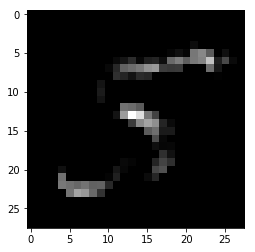

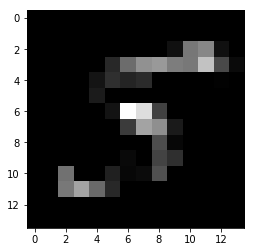

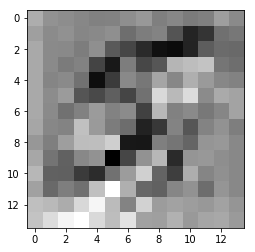

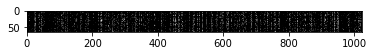

iter:  5100 train_cost:  0.0 train_acc:  1.0 test_cost:  43.527992 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


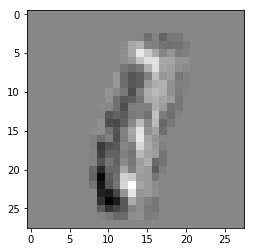

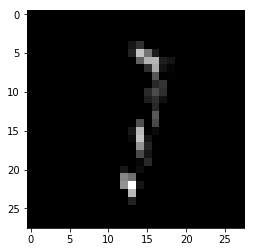

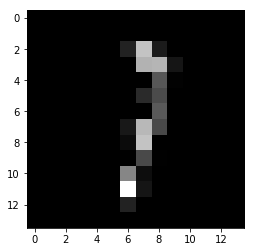

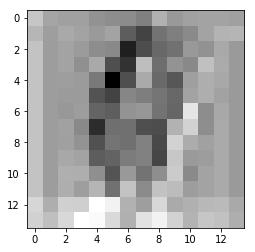

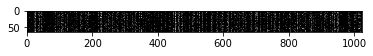

iter:  5200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


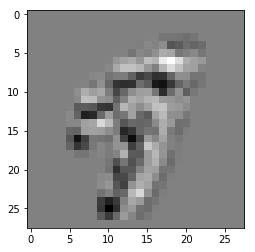

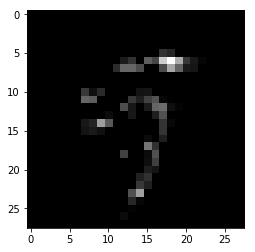

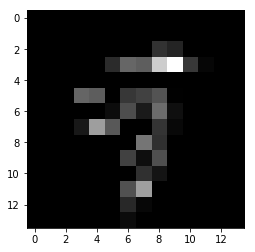

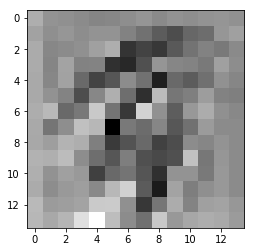

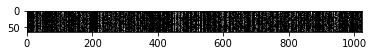

iter:  5300 train_cost:  0.0 train_acc:  1.0 test_cost:  156.3514 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


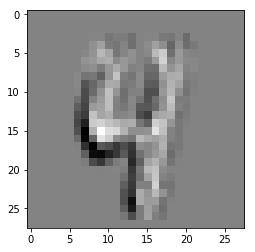

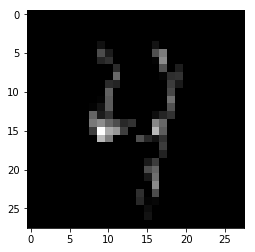

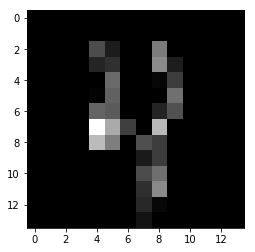

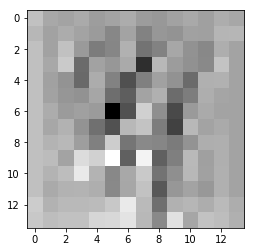

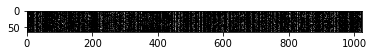

iter:  5400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


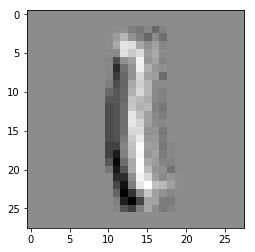

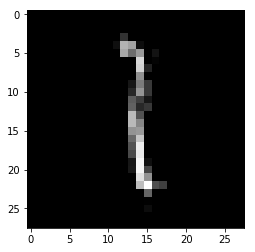

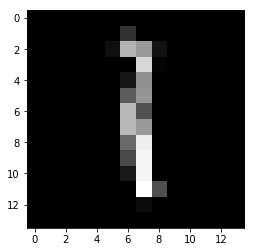

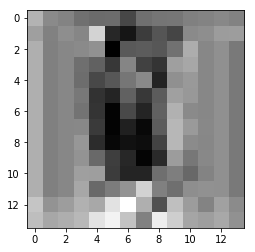

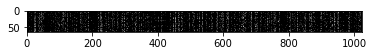

iter:  5500 train_cost:  12.326935 train_acc:  0.984375 test_cost:  144.06305 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


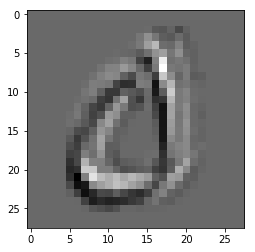

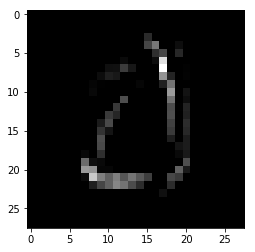

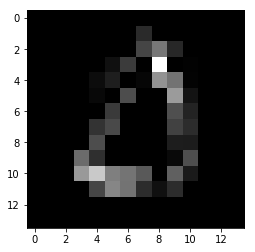

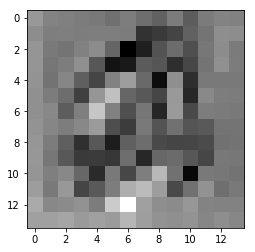

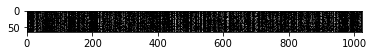

iter:  5600 train_cost:  28.467438 train_acc:  0.984375 test_cost:  28.274567 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


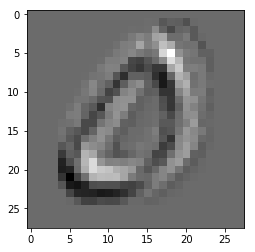

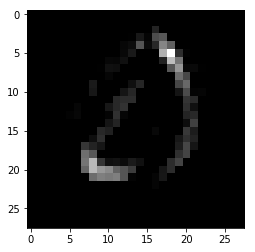

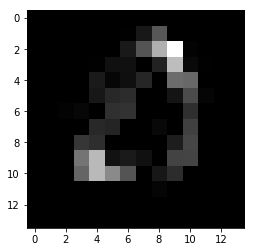

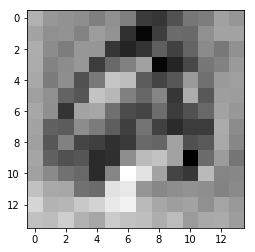

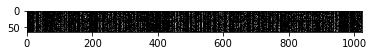

iter:  5700 train_cost:  0.0 train_acc:  1.0 test_cost:  33.998047 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


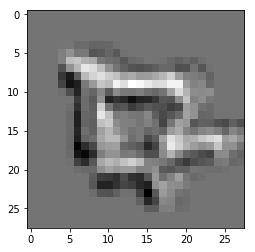

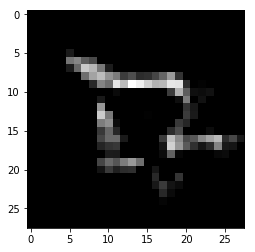

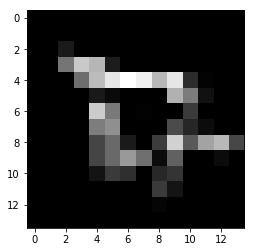

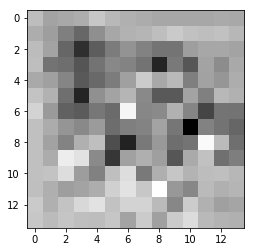

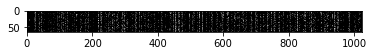

iter:  5800 train_cost:  1.8885498 train_acc:  0.984375 test_cost:  414.1657 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


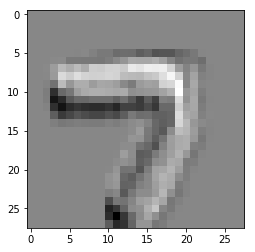

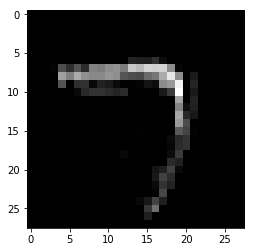

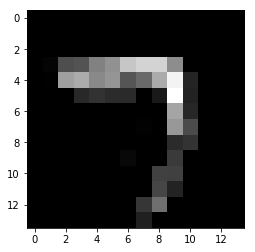

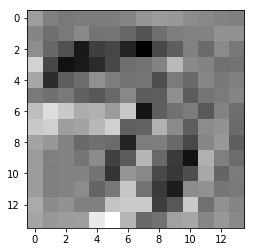

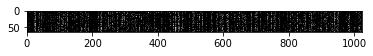

iter:  5900 train_cost:  138.10782 train_acc:  0.984375 test_cost:  22.15216 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


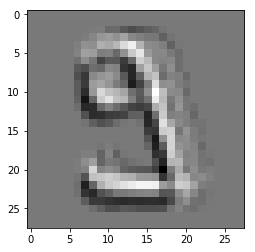

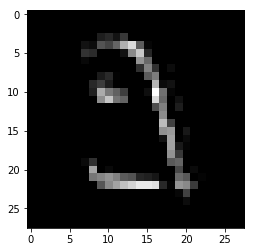

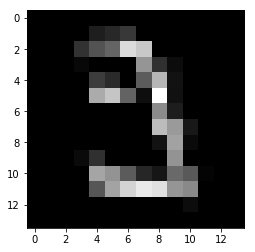

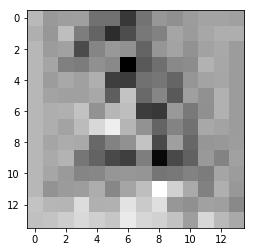

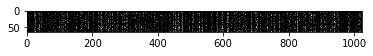

iter:  6000 train_cost:  0.0 train_acc:  1.0 test_cost:  187.411 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


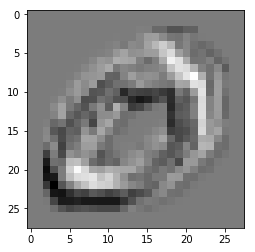

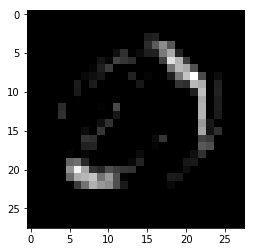

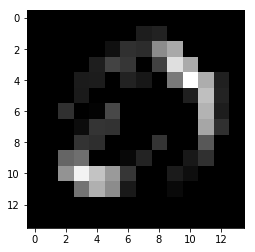

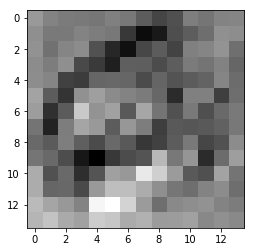

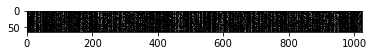

iter:  6100 train_cost:  98.32561 train_acc:  0.984375 test_cost:  56.670517 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


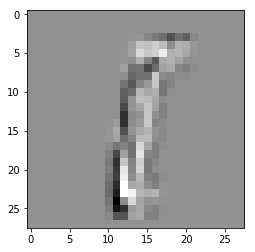

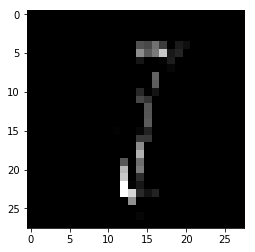

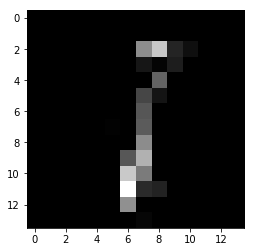

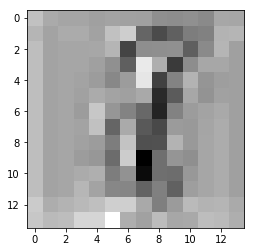

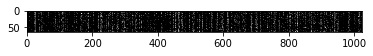

iter:  6200 train_cost:  0.0 train_acc:  1.0 test_cost:  22.466599 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


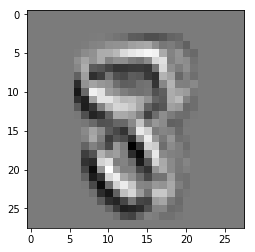

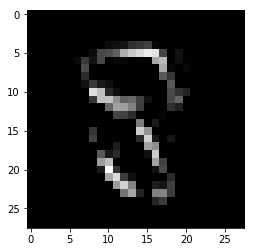

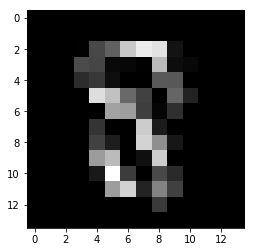

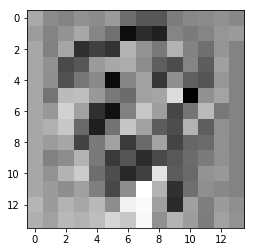

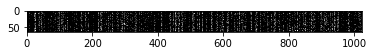

iter:  6300 train_cost:  19.116302 train_acc:  0.984375 test_cost:  15.630966 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


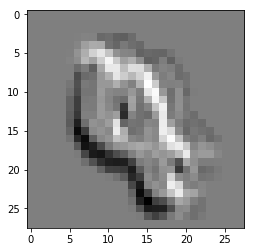

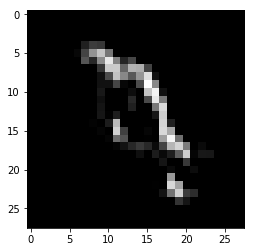

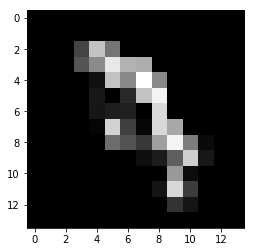

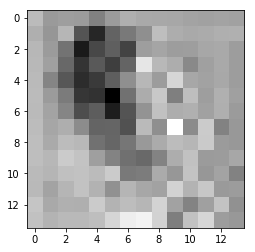

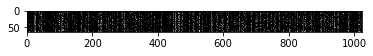

iter:  6400 train_cost:  0.0 train_acc:  1.0 test_cost:  366.4425 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


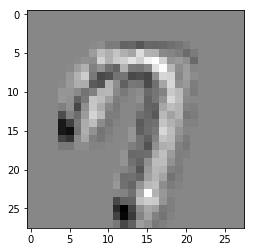

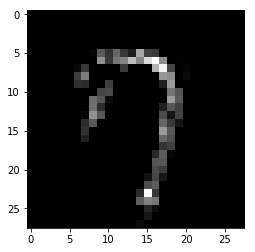

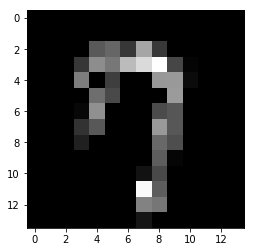

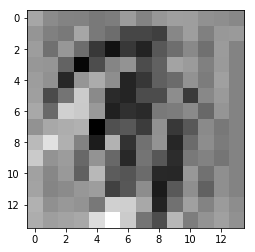

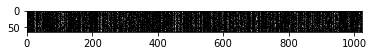

iter:  6500 train_cost:  0.0 train_acc:  1.0 test_cost:  43.66571 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


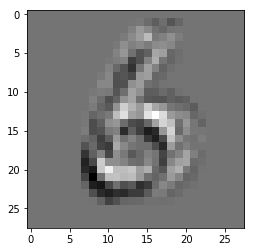

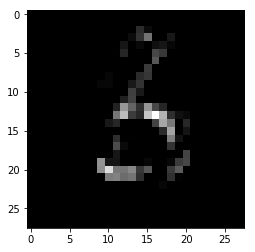

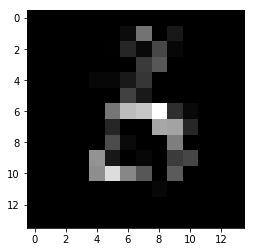

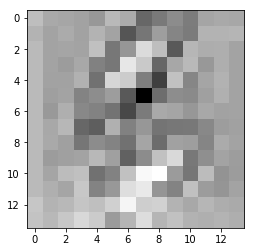

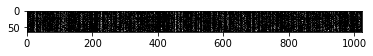

iter:  6600 train_cost:  0.0 train_acc:  1.0 test_cost:  238.61848 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


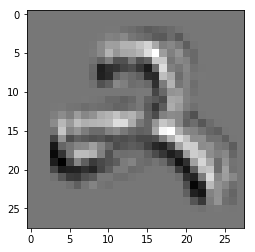

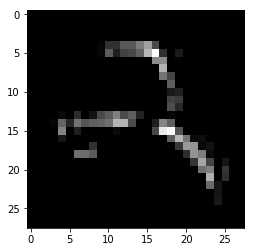

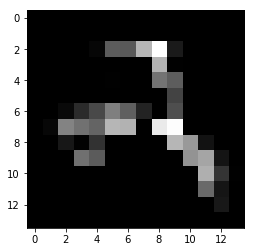

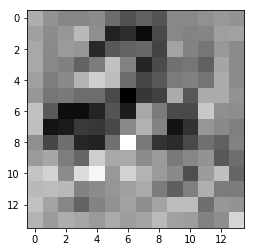

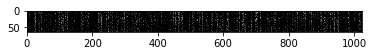

iter:  6700 train_cost:  0.0 train_acc:  1.0 test_cost:  73.04149 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


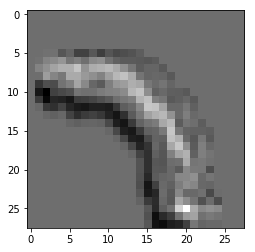

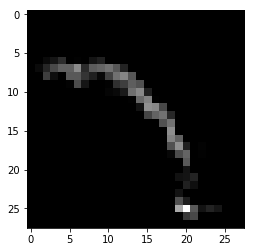

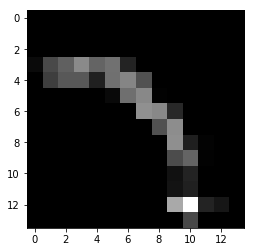

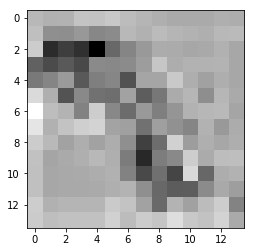

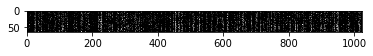

iter:  6800 train_cost:  0.0 train_acc:  1.0 test_cost:  22.207428 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


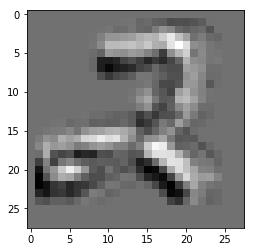

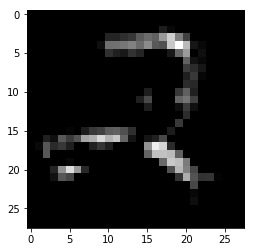

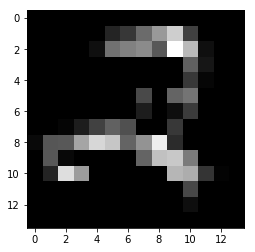

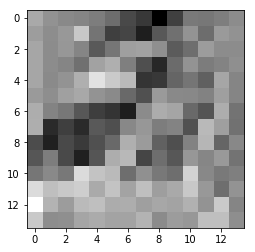

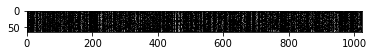

iter:  6900 train_cost:  2.3389435 train_acc:  0.984375 test_cost:  73.89578 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


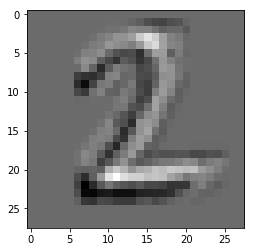

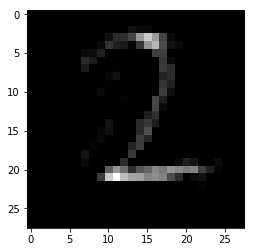

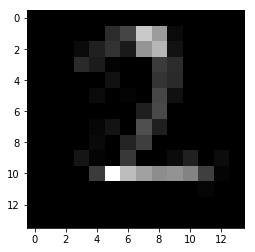

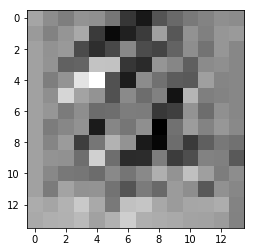

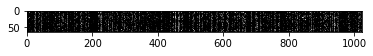

iter:  7000 train_cost:  0.0 train_acc:  1.0 test_cost:  48.356476 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


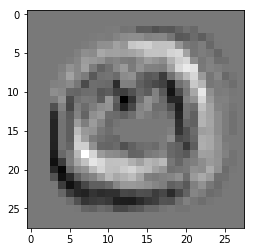

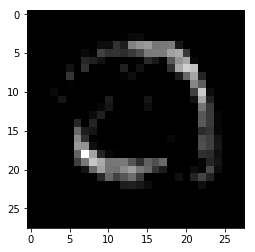

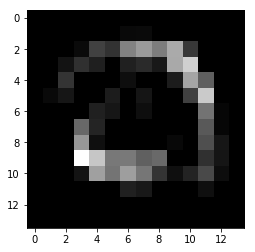

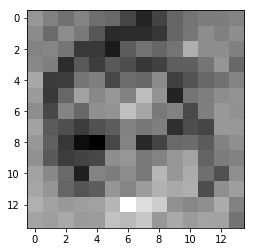

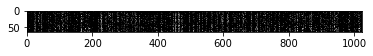

iter:  7100 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


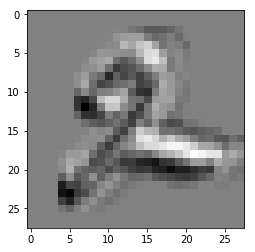

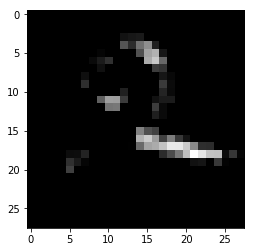

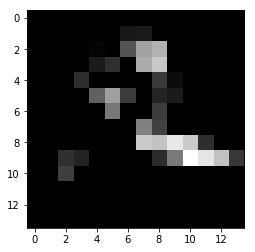

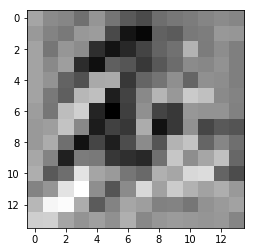

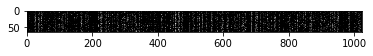

iter:  7200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


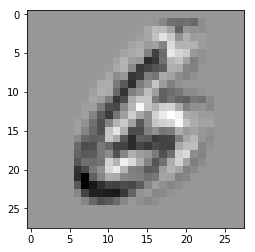

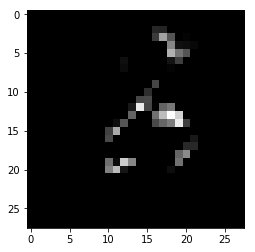

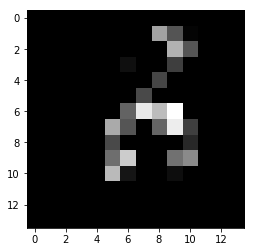

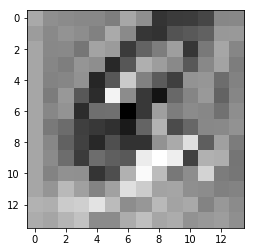

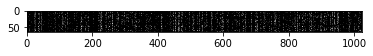

iter:  7300 train_cost:  0.0 train_acc:  1.0 test_cost:  3.788498 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


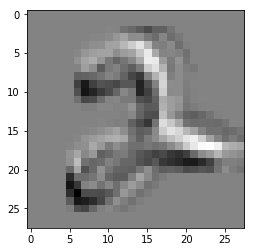

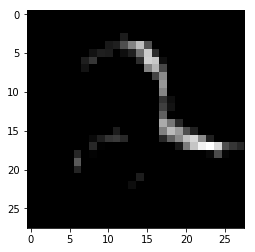

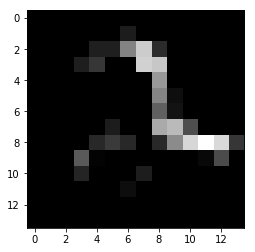

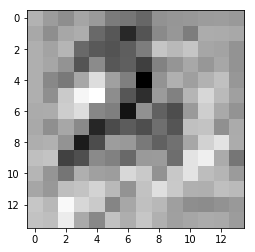

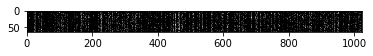

iter:  7400 train_cost:  0.0 train_acc:  1.0 test_cost:  236.99437 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


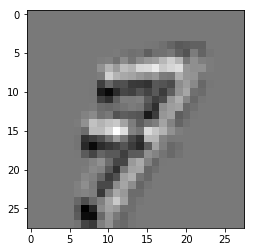

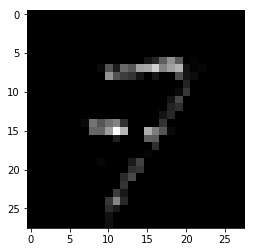

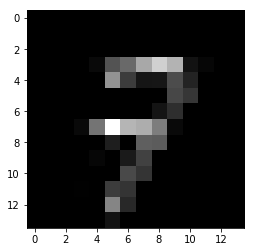

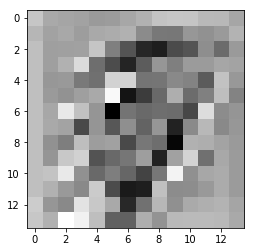

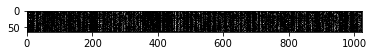

iter:  7500 train_cost:  0.0 train_acc:  1.0 test_cost:  47.57509 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


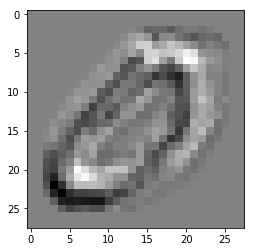

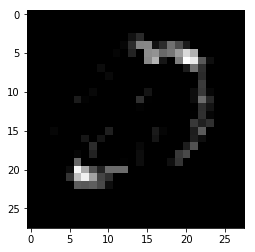

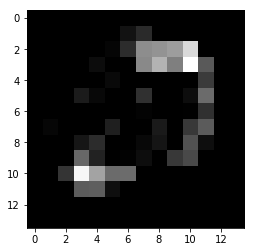

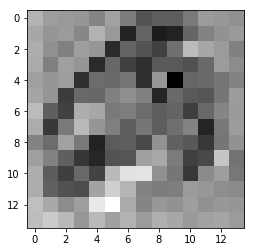

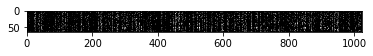

iter:  7600 train_cost:  0.0 train_acc:  1.0 test_cost:  83.47528 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


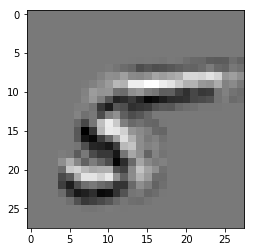

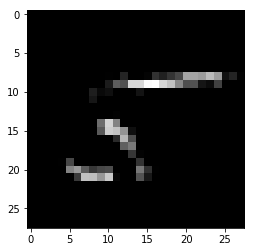

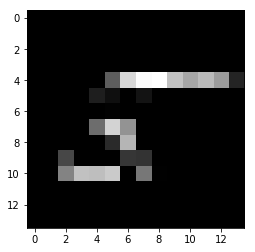

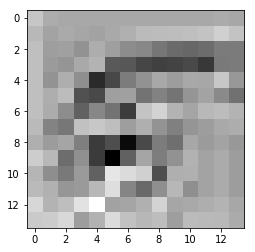

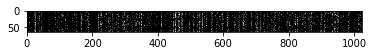

iter:  7700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


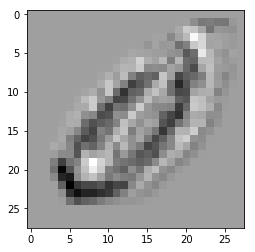

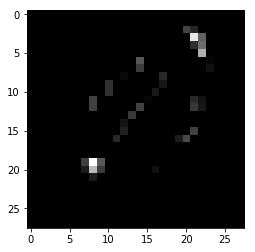

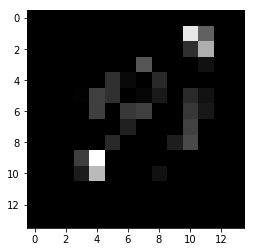

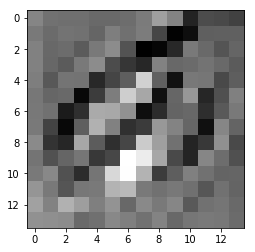

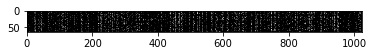

iter:  7800 train_cost:  0.0 train_acc:  1.0 test_cost:  33.708557 test_acc:  0.984375 num_of_returned_sensors: 7


KeyboardInterrupt: ignored

In [34]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('operations'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
merged = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        train_writer.add_summary(summary, i)
        
        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)

# Tensorboard Visualisation

In [4]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-06 08:33:56--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.73.9.93, 34.206.36.121, 3.92.108.98, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.73.9.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  3.77MB/s    in 6.0s    

2019-06-06 08:34:02 (2.65 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
!rm -rf log2

In [0]:
LOG_DIR = './log2'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6009 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6009 &')

In [6]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://8a05262f.ngrok.io


conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
(64, 1024)


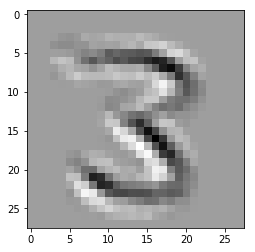

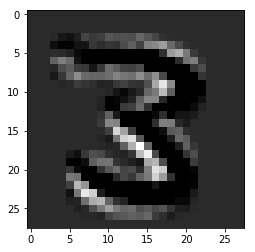

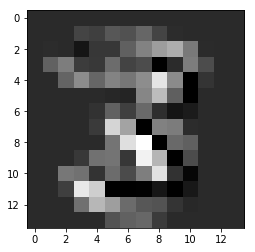

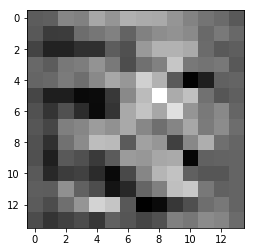

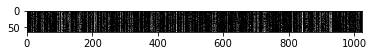

iter:  0 train_cost:  35388.547 train_acc:  0.15625 test_cost:  41571.438 test_acc:  0.125 num_of_returned_sensors: 7
(64, 1024)


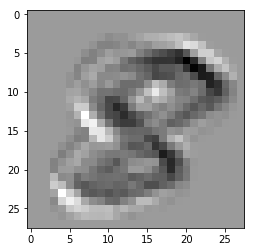

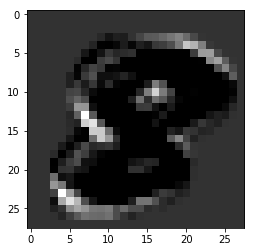

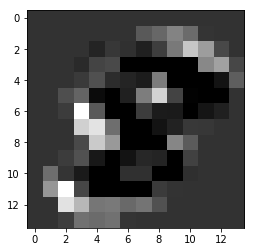

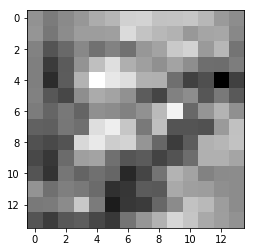

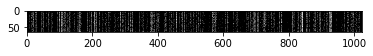

iter:  100 train_cost:  3379.6133 train_acc:  0.828125 test_cost:  1675.1388 test_acc:  0.859375 num_of_returned_sensors: 7
(64, 1024)


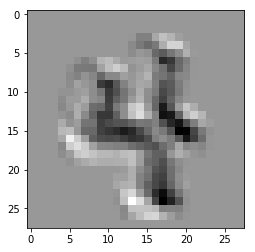

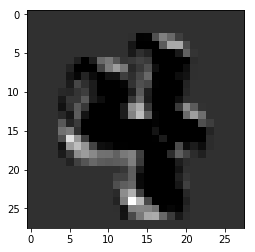

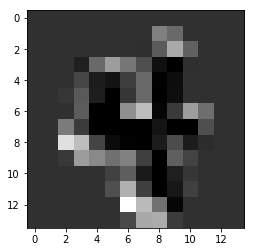

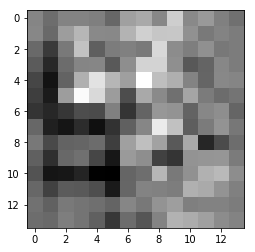

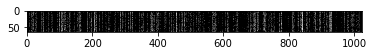

iter:  200 train_cost:  2846.734 train_acc:  0.859375 test_cost:  3005.5312 test_acc:  0.796875 num_of_returned_sensors: 7
(64, 1024)


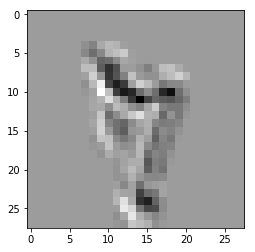

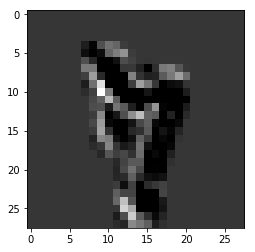

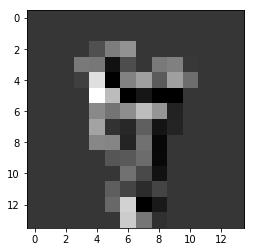

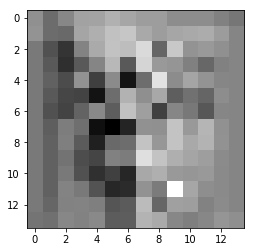

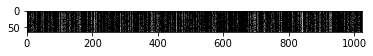

iter:  300 train_cost:  998.8416 train_acc:  0.90625 test_cost:  1774.2668 test_acc:  0.90625 num_of_returned_sensors: 7
(64, 1024)


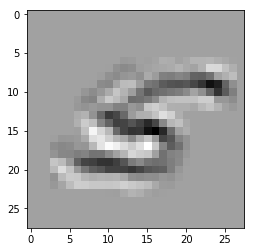

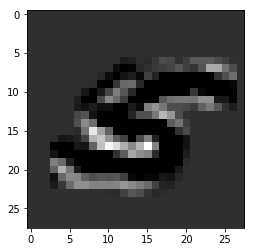

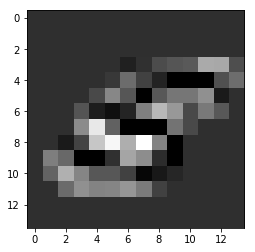

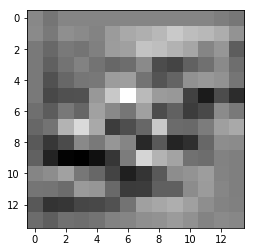

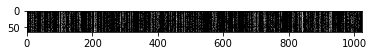

iter:  400 train_cost:  444.86505 train_acc:  0.921875 test_cost:  681.22516 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


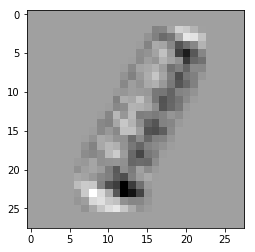

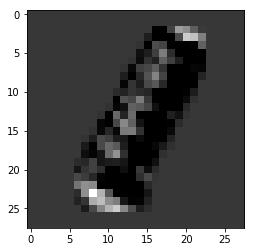

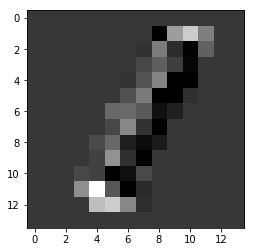

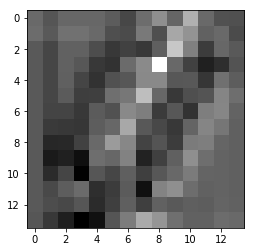

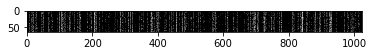

iter:  500 train_cost:  55.87625 train_acc:  0.953125 test_cost:  1429.5348 test_acc:  0.890625 num_of_returned_sensors: 7
(64, 1024)


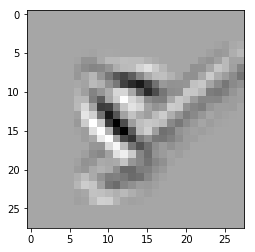

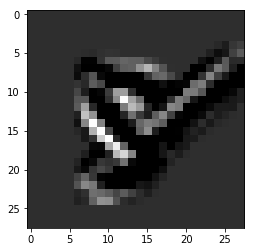

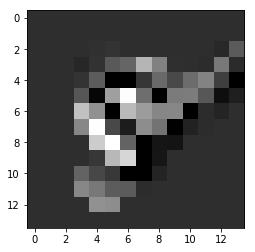

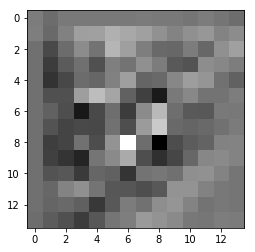

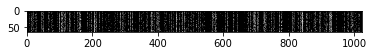

iter:  600 train_cost:  0.0 train_acc:  1.0 test_cost:  1884.9176 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


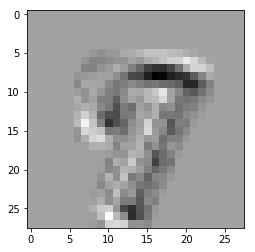

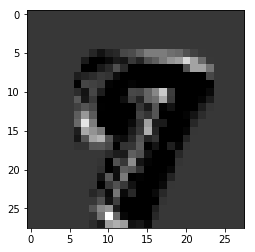

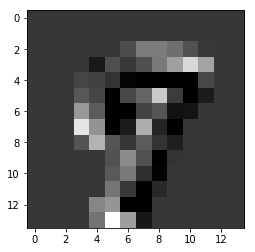

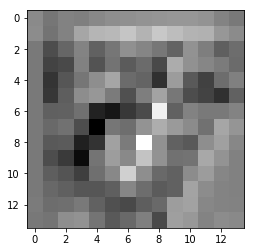

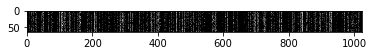

iter:  700 train_cost:  475.50967 train_acc:  0.921875 test_cost:  1182.5393 test_acc:  0.890625 num_of_returned_sensors: 7
(64, 1024)


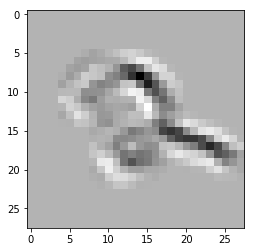

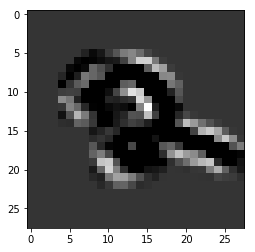

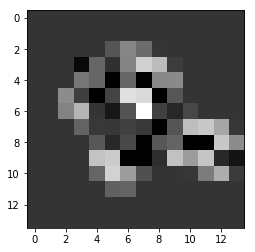

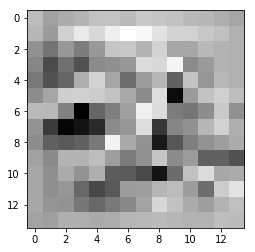

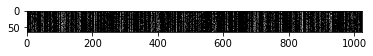

iter:  800 train_cost:  0.0 train_acc:  1.0 test_cost:  840.26276 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


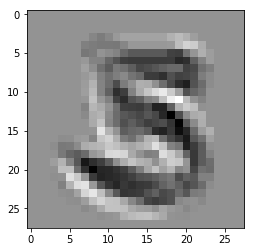

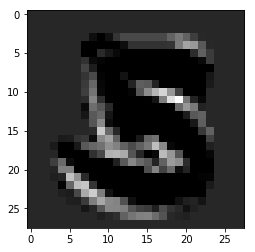

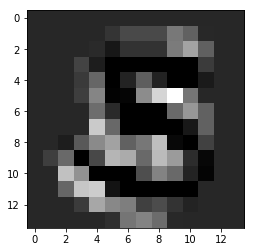

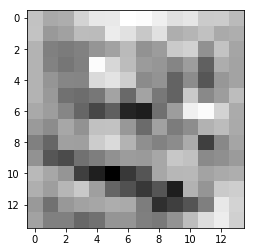

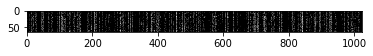

iter:  900 train_cost:  858.64465 train_acc:  0.9375 test_cost:  93.64551 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


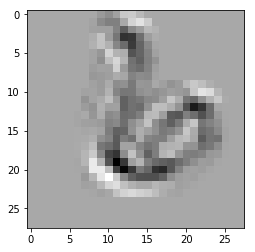

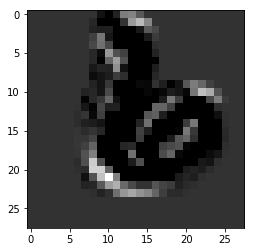

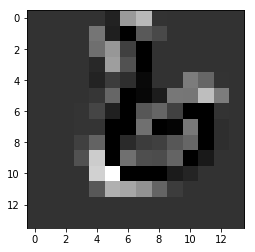

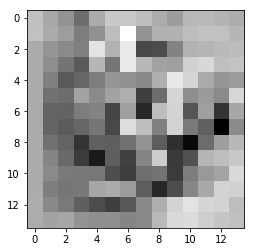

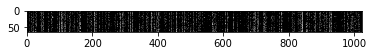

iter:  1000 train_cost:  590.76135 train_acc:  0.953125 test_cost:  628.2035 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


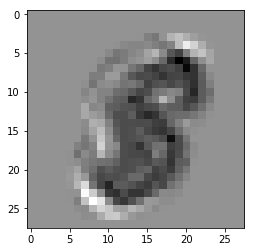

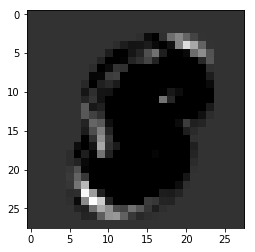

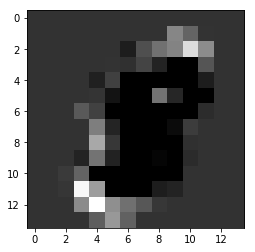

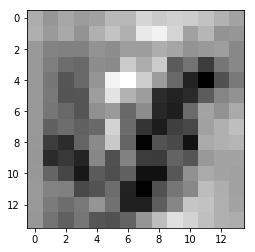

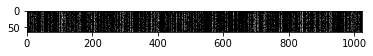

iter:  1100 train_cost:  120.136734 train_acc:  0.96875 test_cost:  165.00482 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


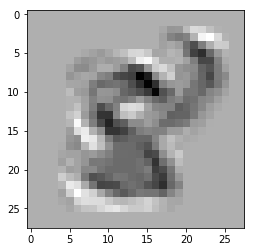

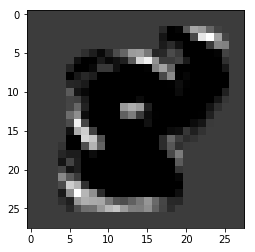

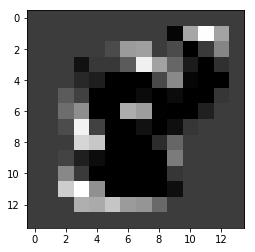

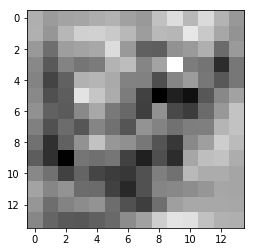

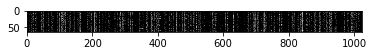

iter:  1200 train_cost:  0.0 train_acc:  1.0 test_cost:  1028.0721 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


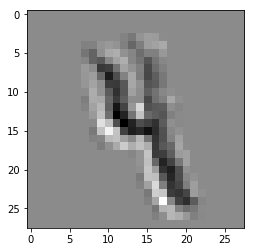

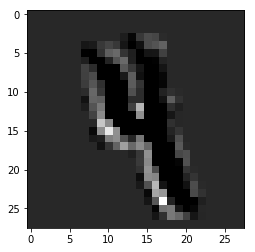

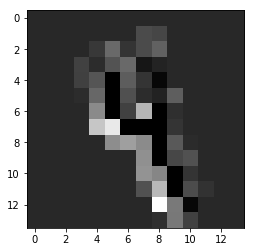

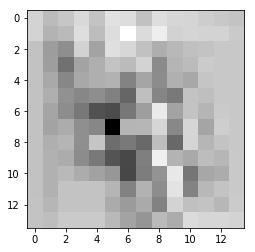

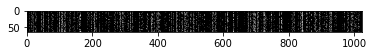

iter:  1300 train_cost:  121.282074 train_acc:  0.96875 test_cost:  99.55478 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


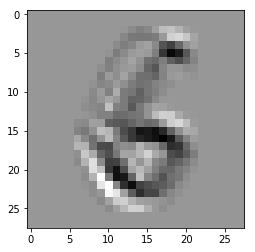

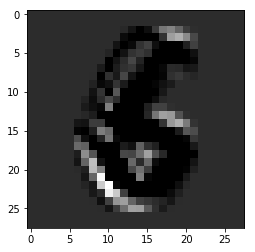

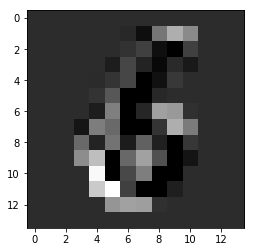

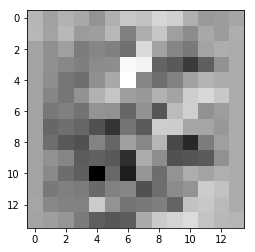

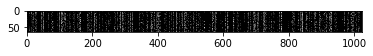

iter:  1400 train_cost:  0.0 train_acc:  1.0 test_cost:  927.03217 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


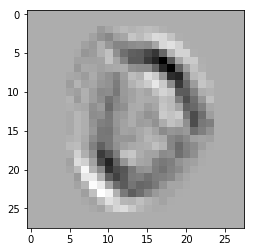

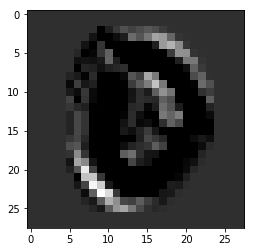

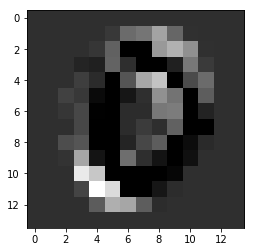

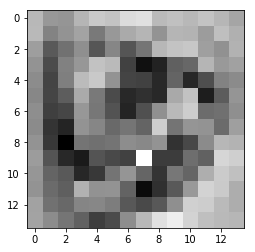

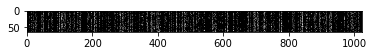

iter:  1500 train_cost:  0.0 train_acc:  1.0 test_cost:  417.72922 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


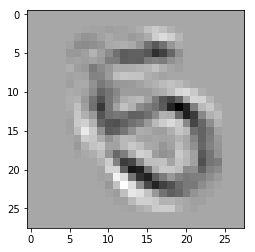

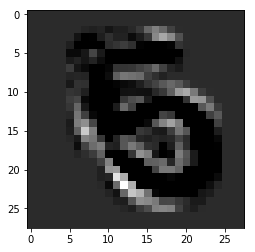

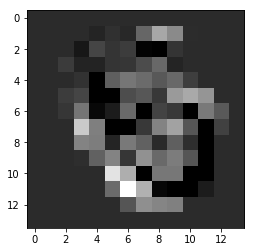

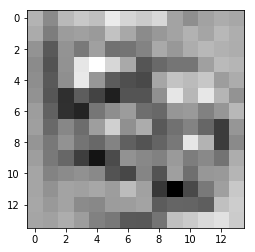

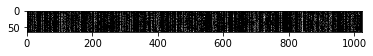

iter:  1600 train_cost:  0.0 train_acc:  1.0 test_cost:  93.20523 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


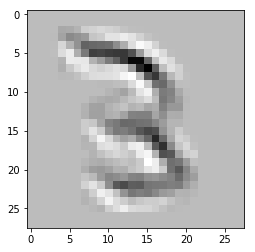

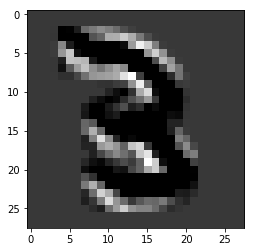

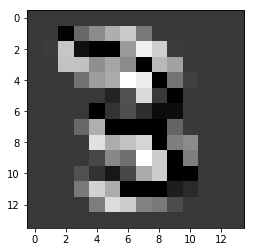

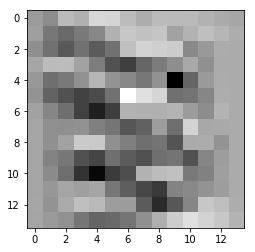

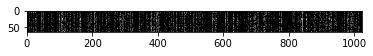

iter:  1700 train_cost:  90.93796 train_acc:  0.96875 test_cost:  372.38428 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


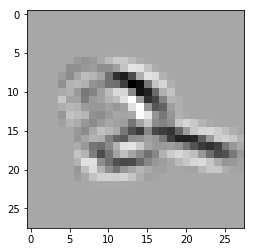

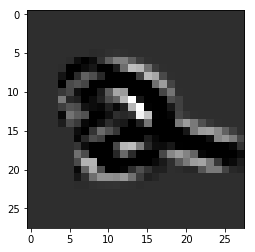

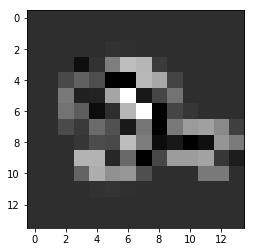

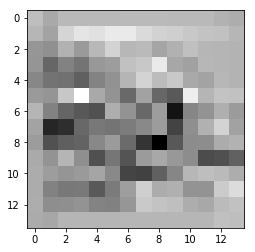

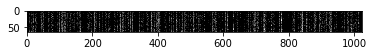

iter:  1800 train_cost:  324.95093 train_acc:  0.9375 test_cost:  45.57379 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


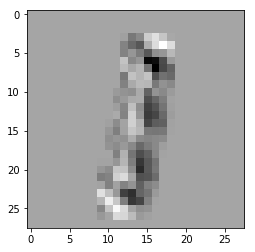

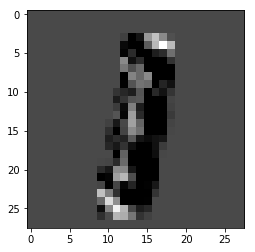

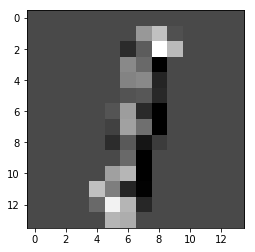

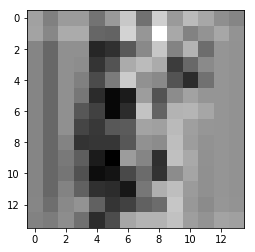

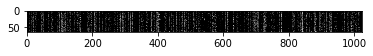

iter:  1900 train_cost:  0.0 train_acc:  1.0 test_cost:  88.16336 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


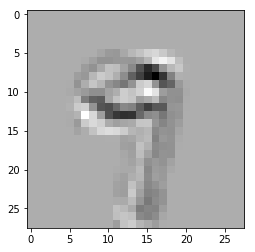

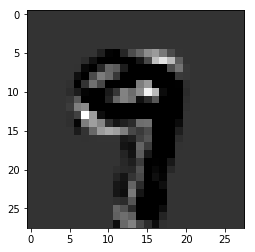

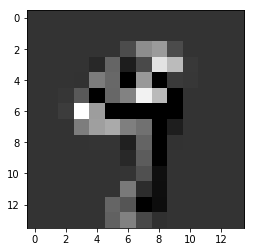

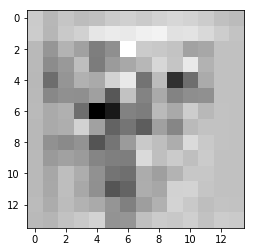

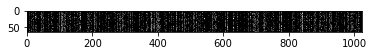

iter:  2000 train_cost:  662.5822 train_acc:  0.921875 test_cost:  263.38998 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


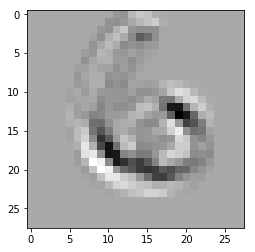

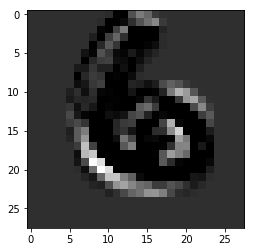

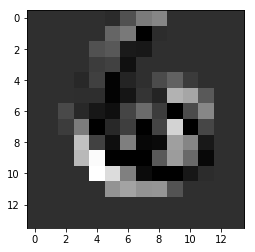

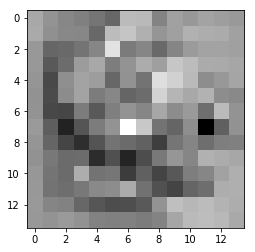

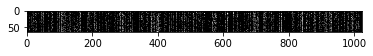

iter:  2100 train_cost:  0.0 train_acc:  1.0 test_cost:  288.82675 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


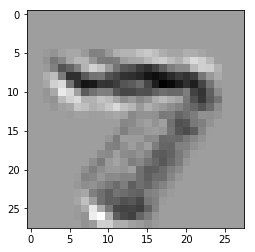

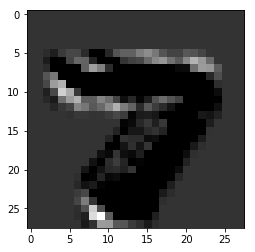

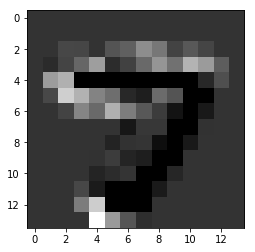

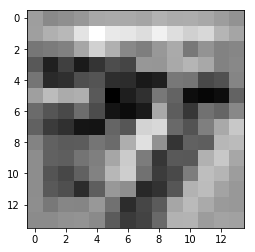

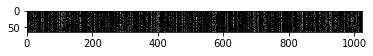

iter:  2200 train_cost:  0.0 train_acc:  1.0 test_cost:  107.71173 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


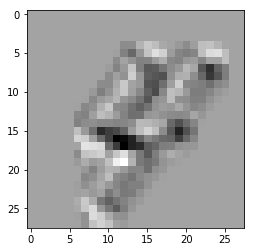

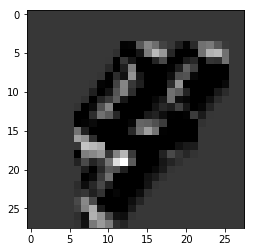

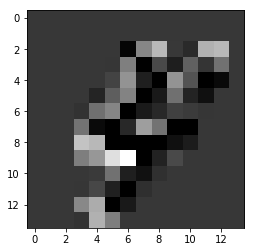

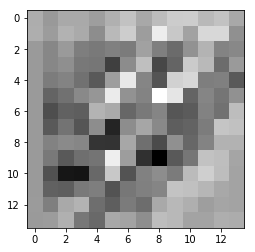

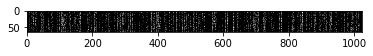

iter:  2300 train_cost:  0.0 train_acc:  1.0 test_cost:  282.38742 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


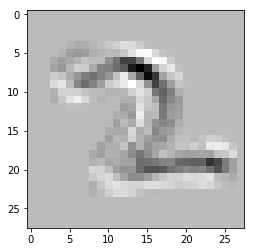

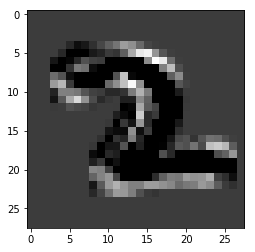

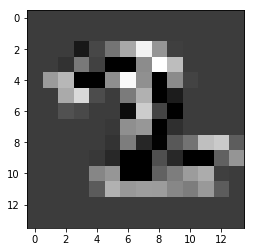

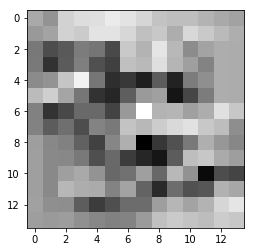

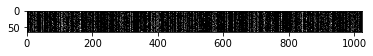

iter:  2400 train_cost:  105.21881 train_acc:  0.984375 test_cost:  666.63513 test_acc:  0.90625 num_of_returned_sensors: 7
(64, 1024)


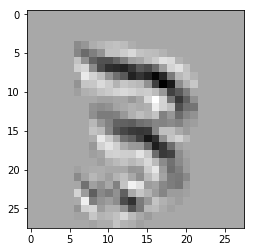

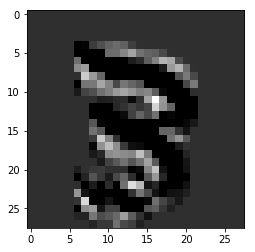

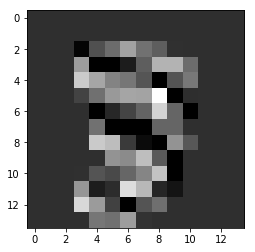

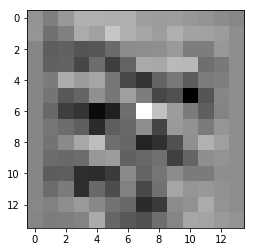

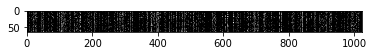

iter:  2500 train_cost:  28.648514 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


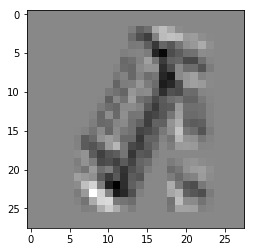

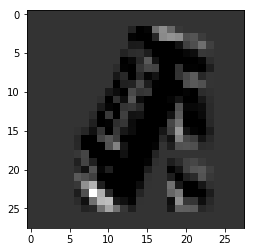

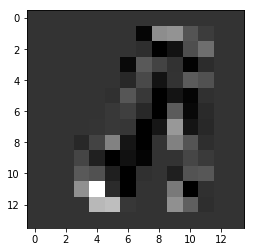

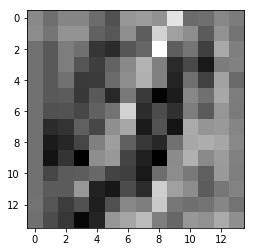

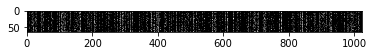

iter:  2600 train_cost:  0.0019687493 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


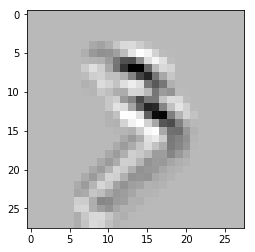

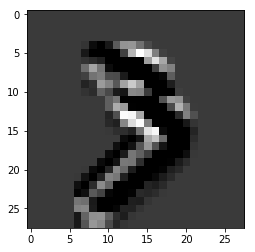

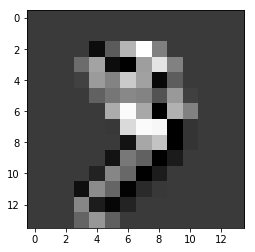

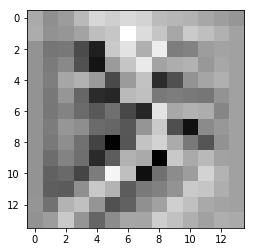

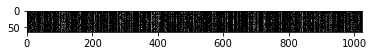

iter:  2700 train_cost:  7.717224 train_acc:  0.984375 test_cost:  151.85986 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


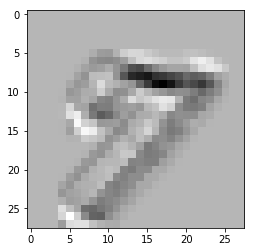

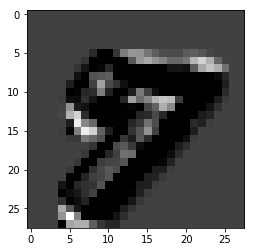

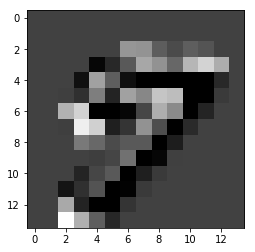

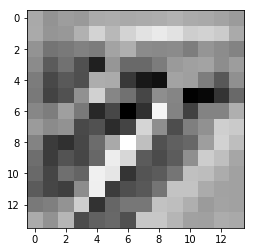

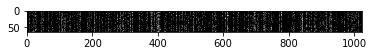

iter:  2800 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


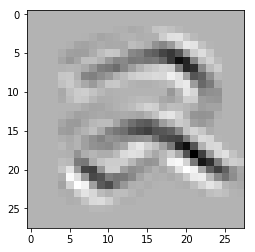

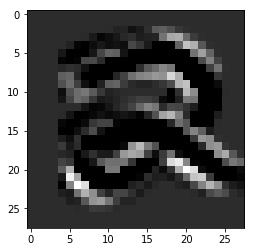

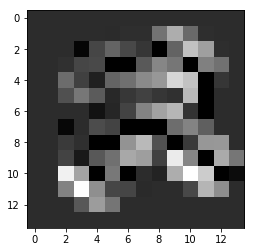

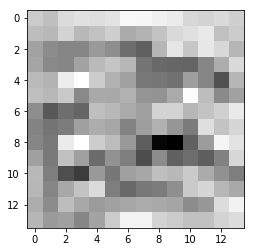

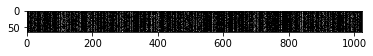

iter:  2900 train_cost:  4.9859924 train_acc:  0.984375 test_cost:  176.11992 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


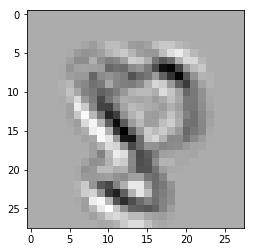

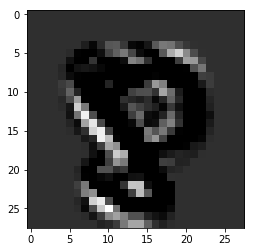

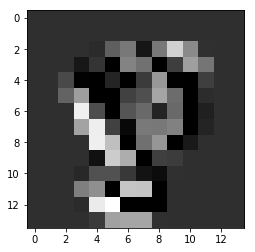

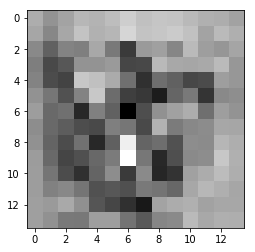

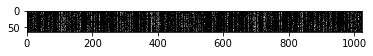

iter:  3000 train_cost:  2.007782 train_acc:  0.984375 test_cost:  328.7715 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


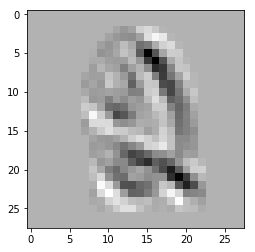

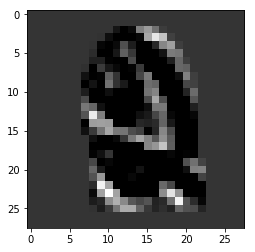

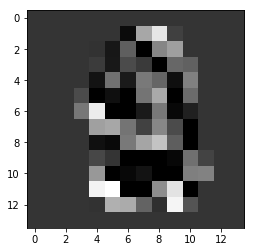

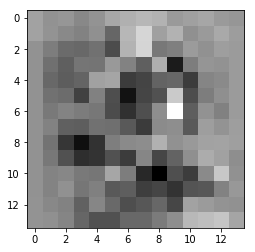

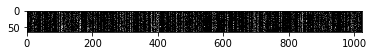

iter:  3100 train_cost:  0.0 train_acc:  1.0 test_cost:  102.2366 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


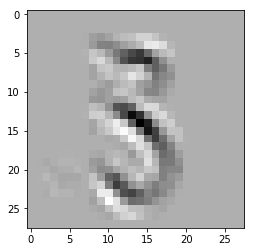

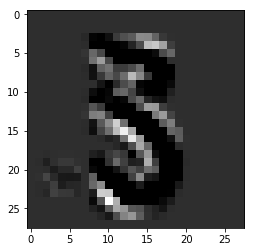

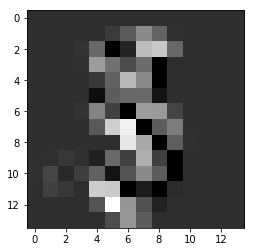

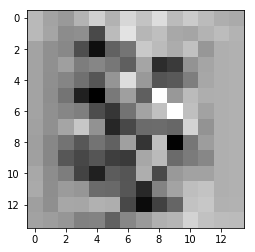

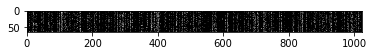

iter:  3200 train_cost:  83.9498 train_acc:  0.96875 test_cost:  120.92819 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


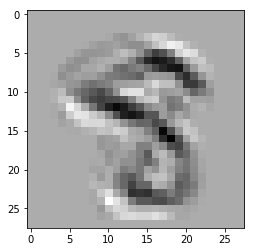

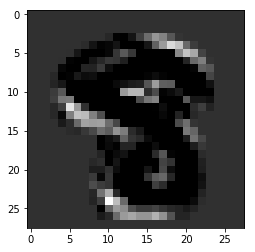

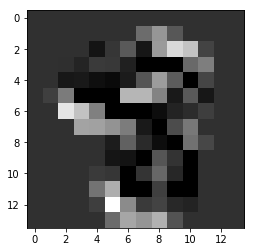

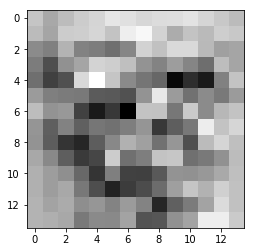

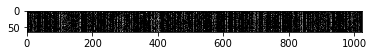

iter:  3300 train_cost:  109.715485 train_acc:  0.953125 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


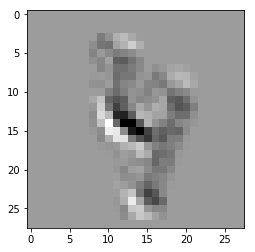

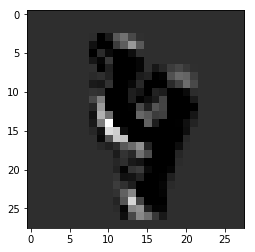

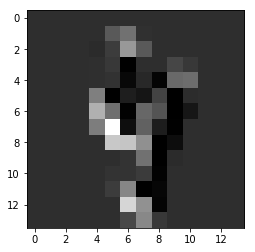

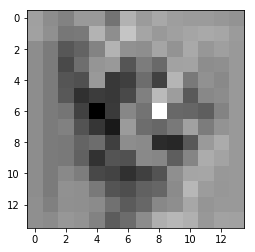

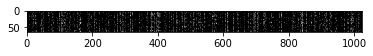

iter:  3400 train_cost:  18.957767 train_acc:  0.96875 test_cost:  81.121704 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


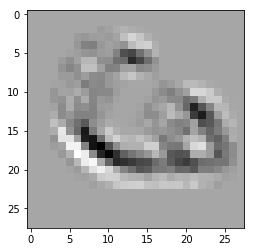

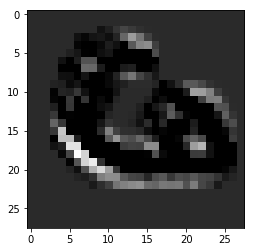

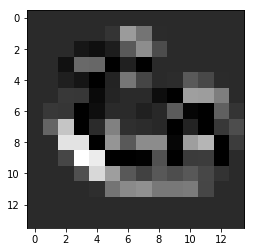

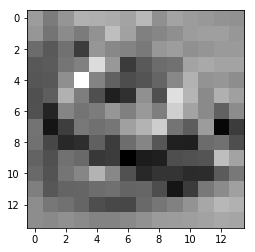

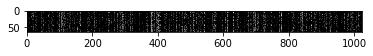

iter:  3500 train_cost:  0.0 train_acc:  1.0 test_cost:  66.67566 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


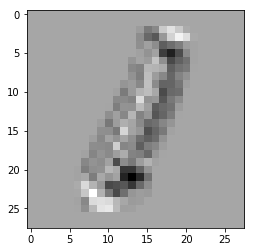

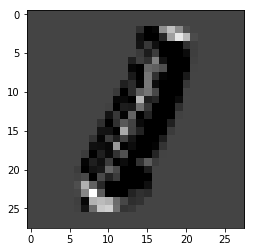

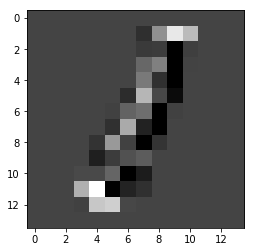

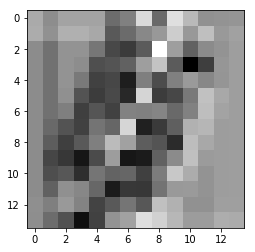

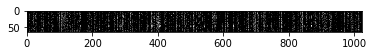

iter:  3600 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


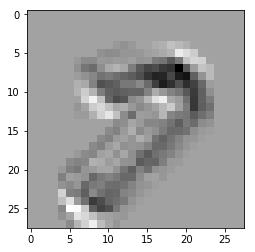

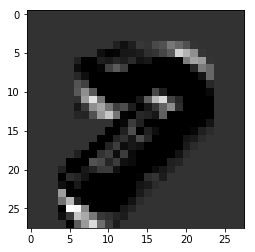

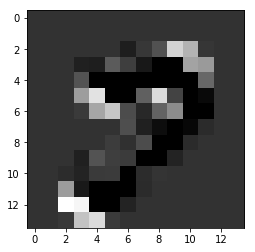

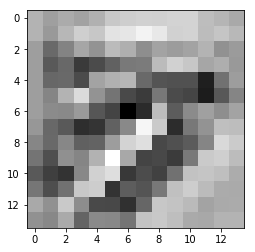

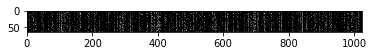

iter:  3700 train_cost:  99.49698 train_acc:  0.96875 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


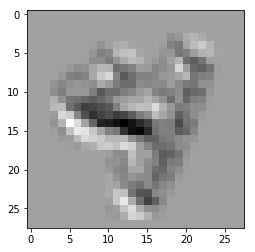

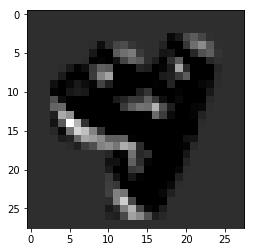

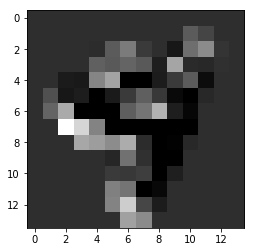

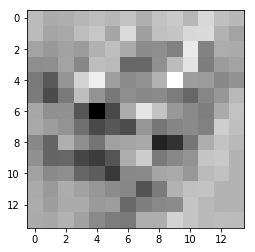

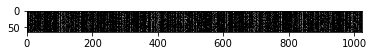

iter:  3800 train_cost:  0.0 train_acc:  1.0 test_cost:  23.671036 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


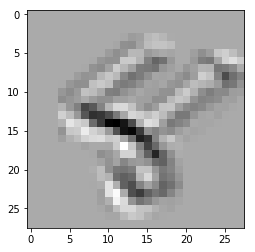

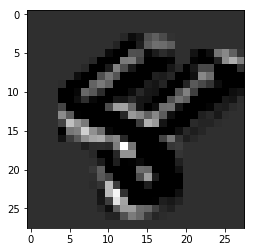

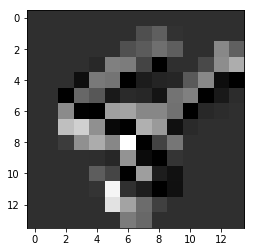

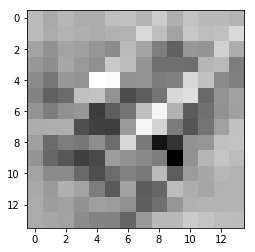

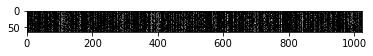

iter:  3900 train_cost:  0.0 train_acc:  1.0 test_cost:  35.587006 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


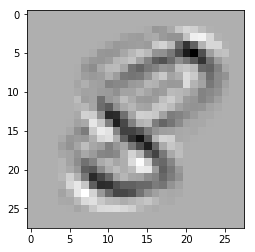

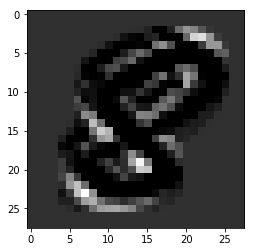

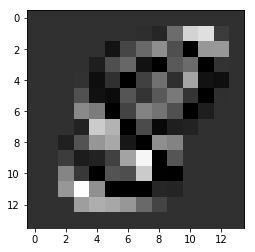

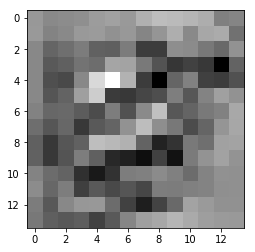

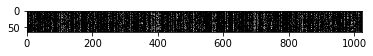

iter:  4000 train_cost:  0.0 train_acc:  1.0 test_cost:  133.73022 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


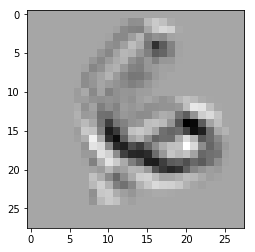

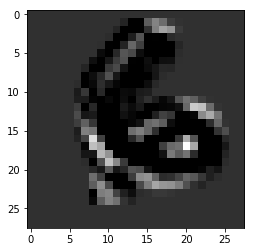

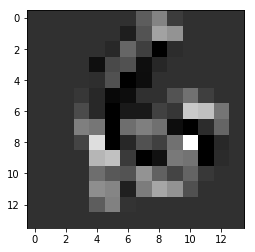

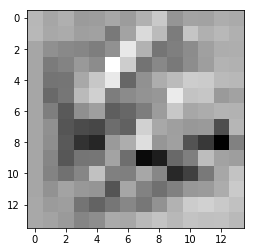

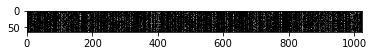

iter:  4100 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


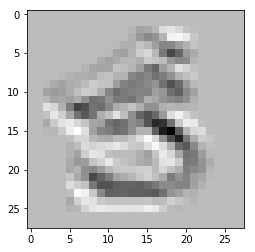

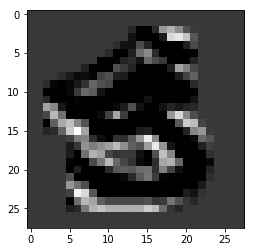

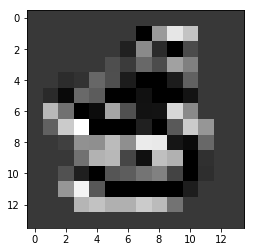

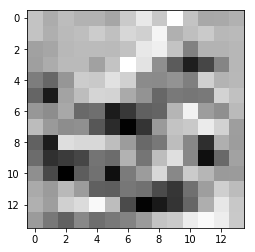

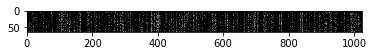

iter:  4200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


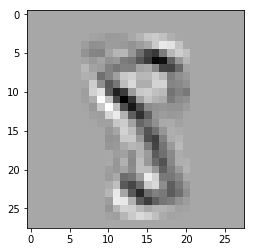

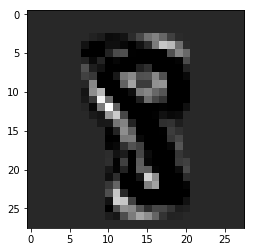

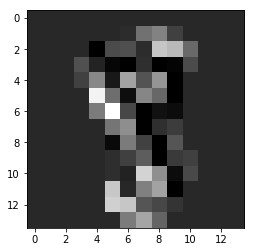

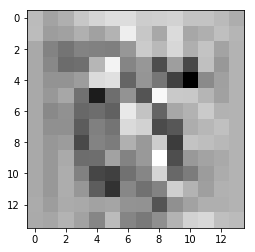

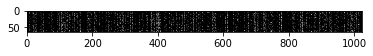

iter:  4300 train_cost:  0.0 train_acc:  1.0 test_cost:  5.7102356 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


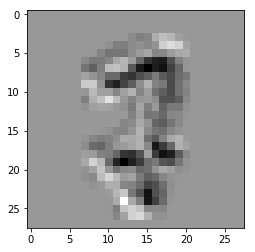

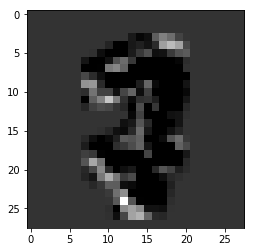

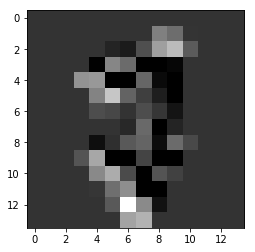

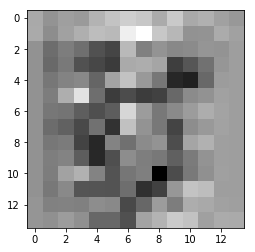

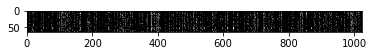

iter:  4400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


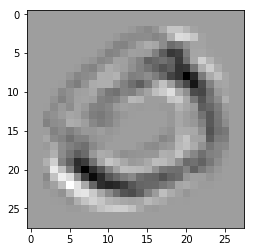

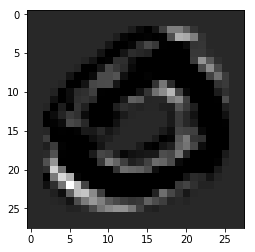

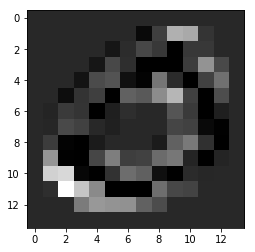

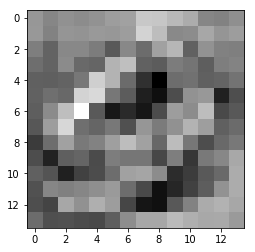

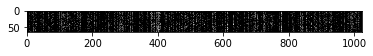

iter:  4500 train_cost:  13.503296 train_acc:  0.984375 test_cost:  189.2717 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


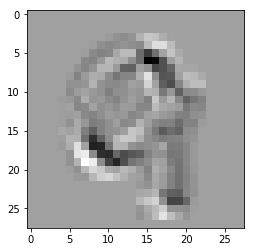

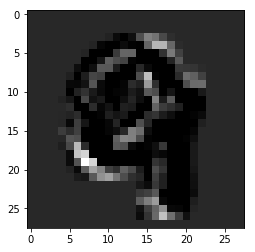

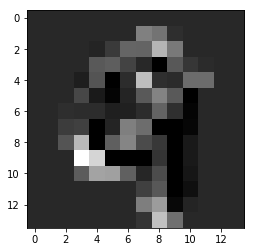

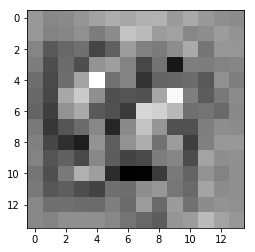

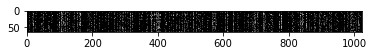

iter:  4600 train_cost:  0.0 train_acc:  1.0 test_cost:  28.263855 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


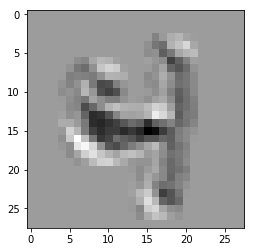

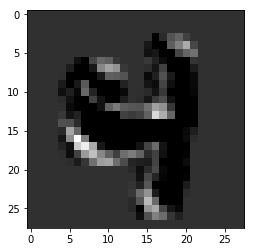

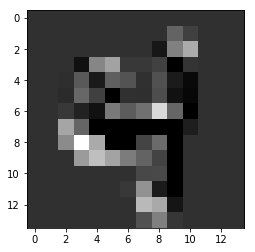

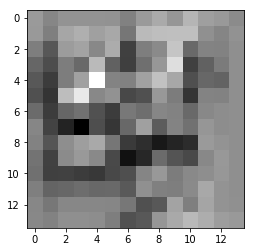

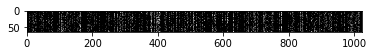

iter:  4700 train_cost:  3.6412048 train_acc:  0.984375 test_cost:  39.82132 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


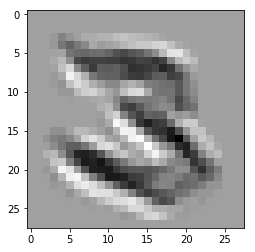

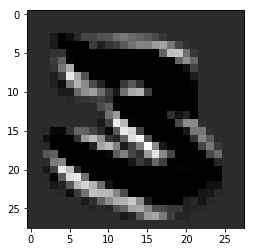

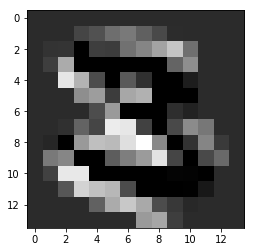

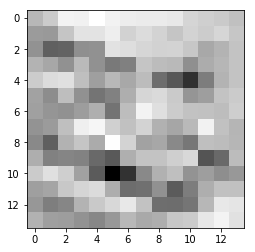

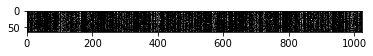

iter:  4800 train_cost:  112.63971 train_acc:  0.96875 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


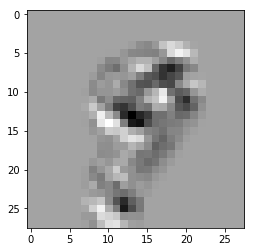

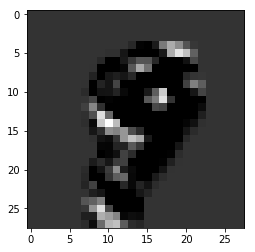

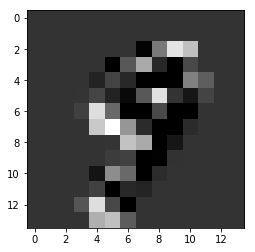

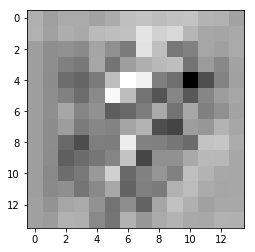

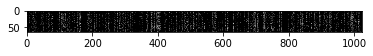

iter:  4900 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
Instructions for updating:
Use standard file APIs to delete files with this prefix.
(64, 1024)


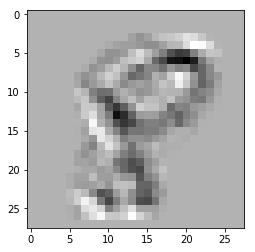

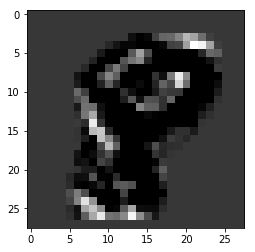

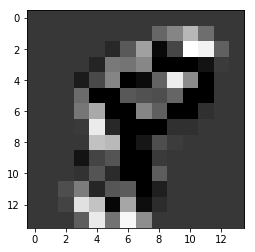

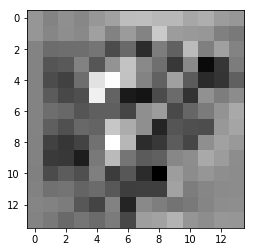

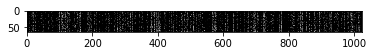

iter:  5000 train_cost:  0.0 train_acc:  1.0 test_cost:  687.21606 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


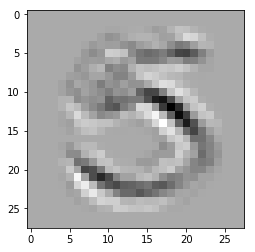

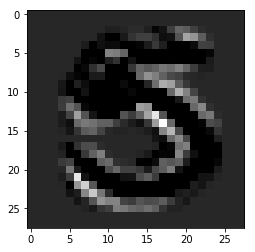

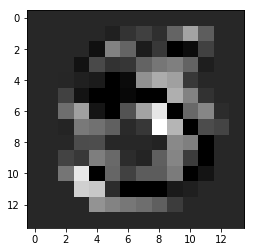

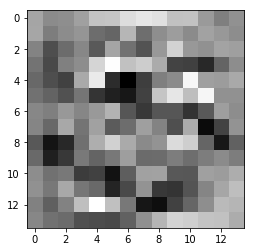

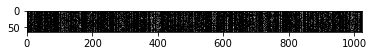

iter:  5100 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


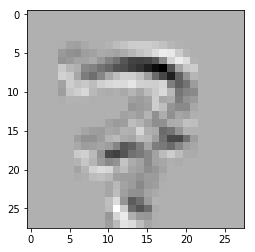

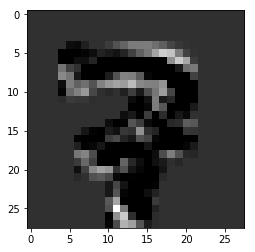

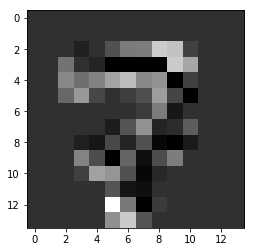

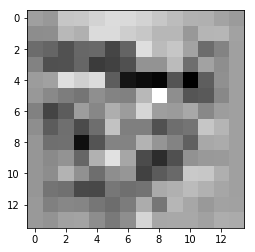

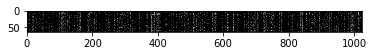

iter:  5200 train_cost:  0.0 train_acc:  1.0 test_cost:  14.582642 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


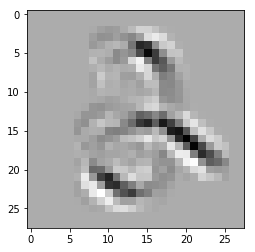

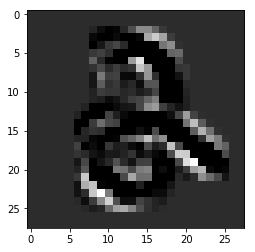

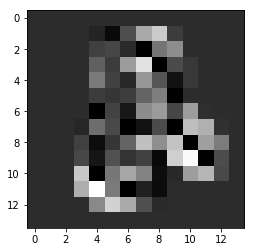

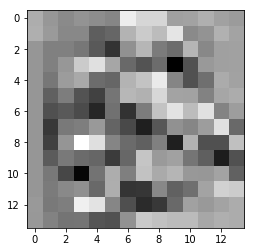

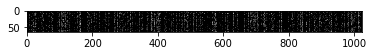

iter:  5300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


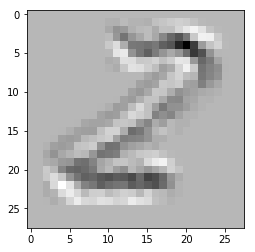

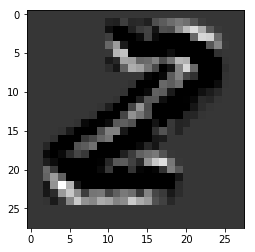

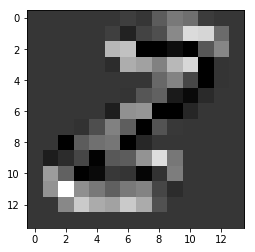

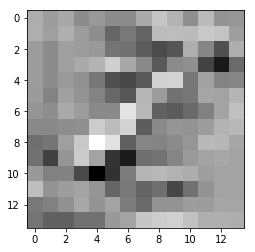

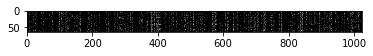

iter:  5400 train_cost:  0.0 train_acc:  1.0 test_cost:  102.32297 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


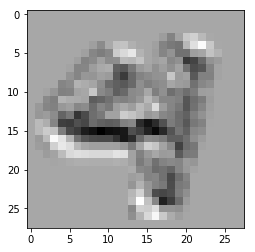

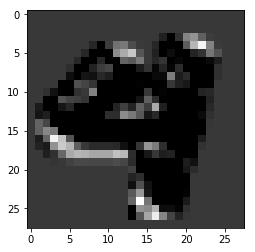

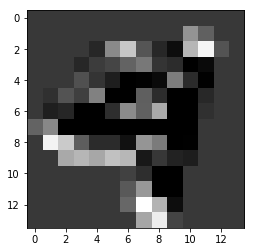

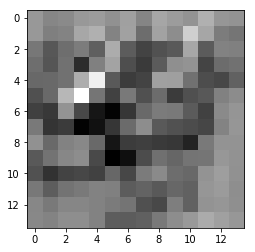

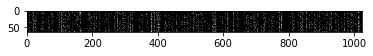

iter:  5500 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


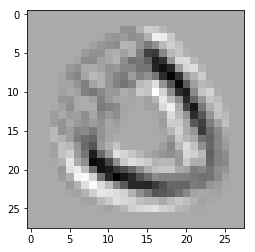

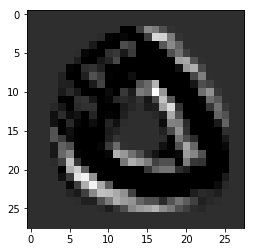

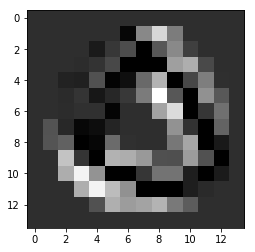

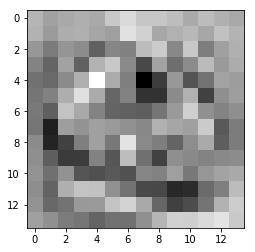

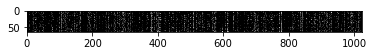

iter:  5600 train_cost:  0.0 train_acc:  1.0 test_cost:  1.0673523 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


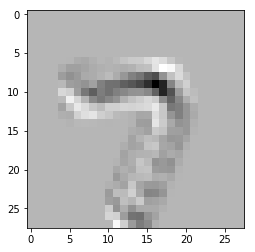

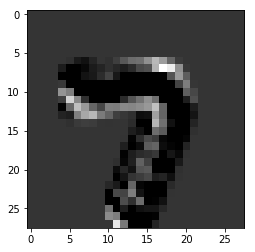

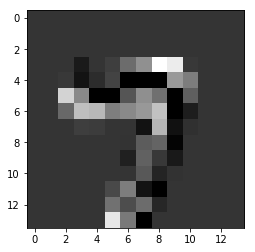

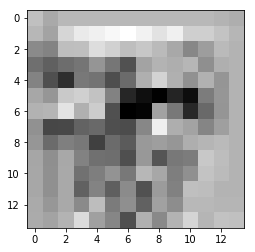

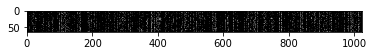

iter:  5700 train_cost:  0.0 train_acc:  1.0 test_cost:  38.117905 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


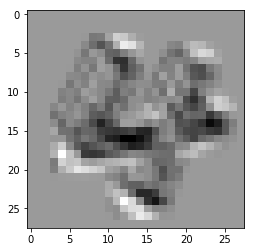

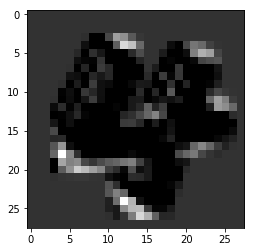

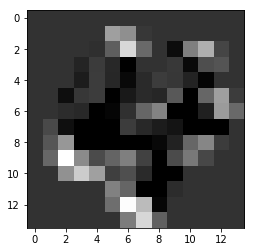

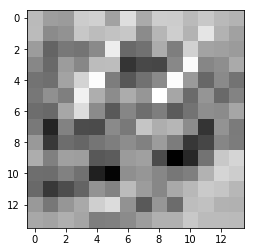

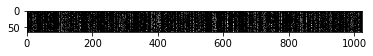

iter:  5800 train_cost:  95.132904 train_acc:  0.984375 test_cost:  77.28595 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


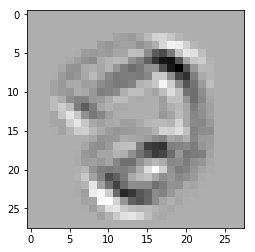

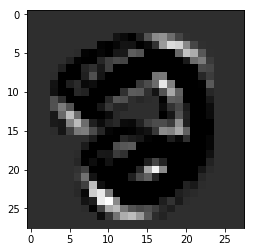

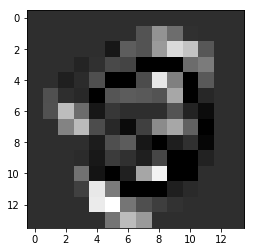

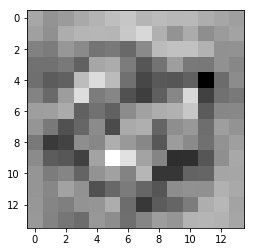

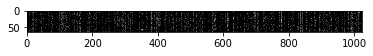

iter:  5900 train_cost:  5.3407288 train_acc:  0.984375 test_cost:  254.53175 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


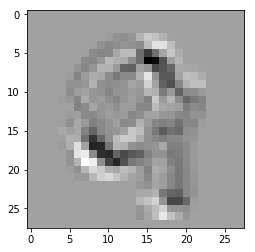

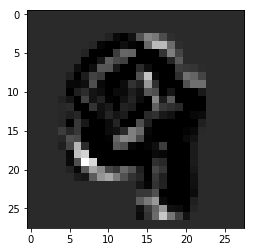

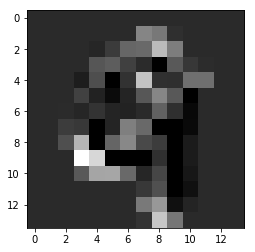

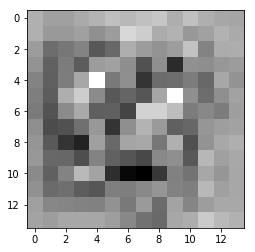

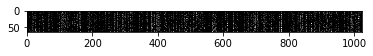

iter:  6000 train_cost:  1.2698975 train_acc:  0.984375 test_cost:  339.03653 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


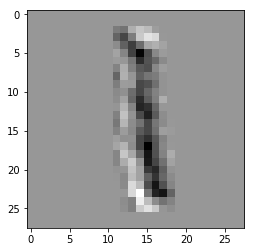

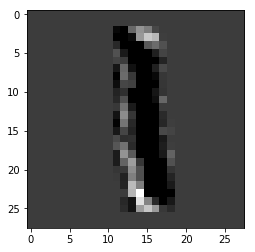

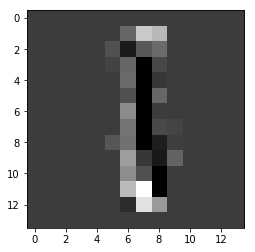

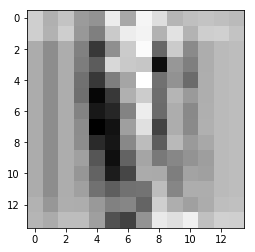

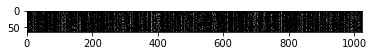

iter:  6100 train_cost:  46.73239 train_acc:  0.984375 test_cost:  73.41638 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


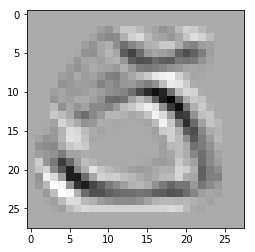

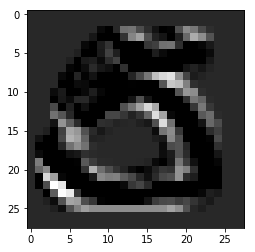

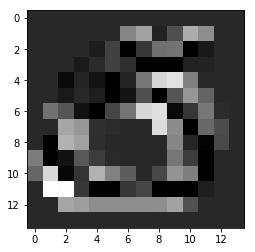

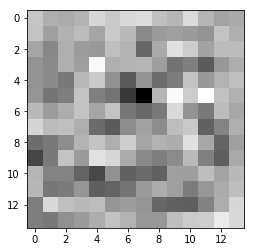

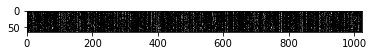

iter:  6200 train_cost:  0.0 train_acc:  1.0 test_cost:  53.624115 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


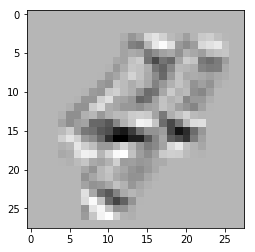

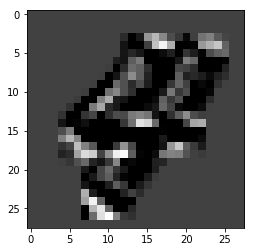

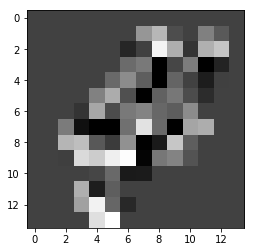

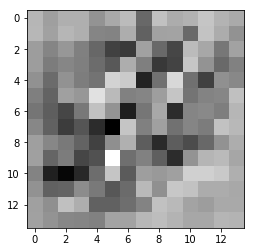

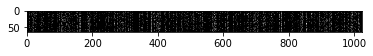

iter:  6300 train_cost:  109.37033 train_acc:  0.96875 test_cost:  118.80182 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


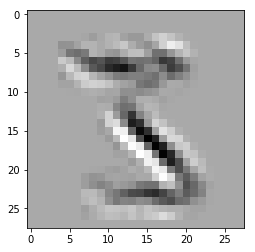

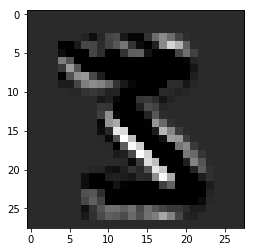

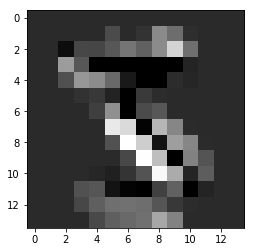

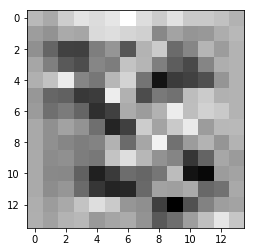

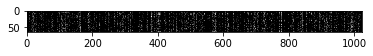

iter:  6400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


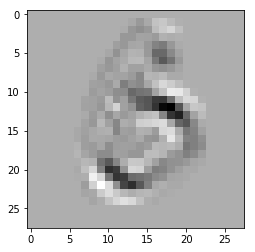

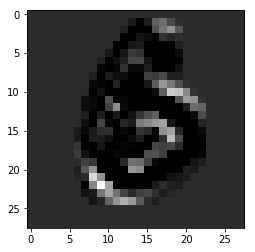

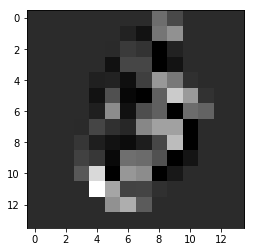

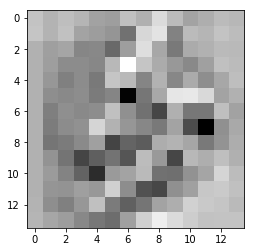

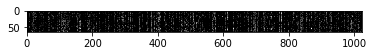

iter:  6500 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


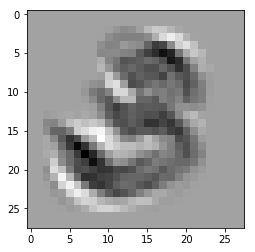

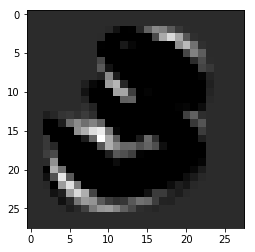

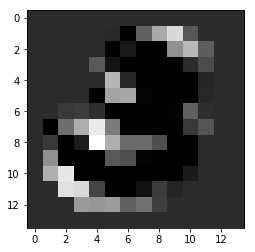

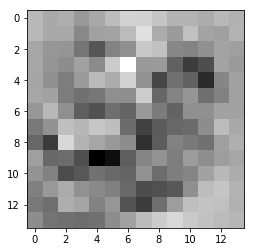

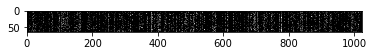

iter:  6600 train_cost:  0.0 train_acc:  1.0 test_cost:  47.031433 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


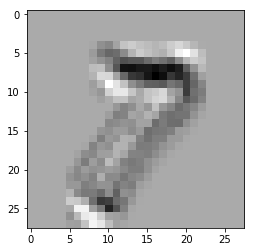

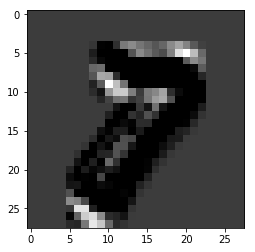

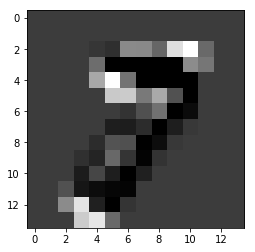

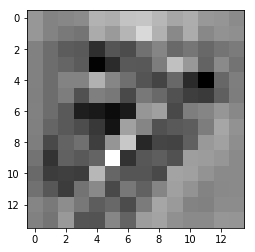

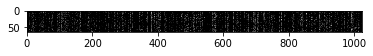

iter:  6700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


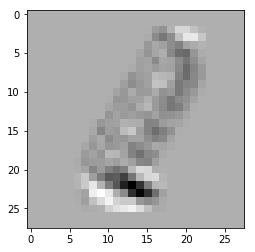

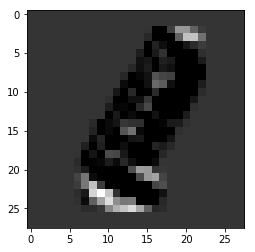

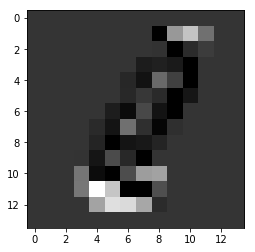

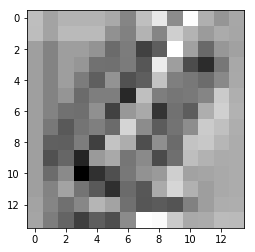

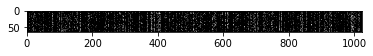

iter:  6800 train_cost:  0.0 train_acc:  1.0 test_cost:  160.2468 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


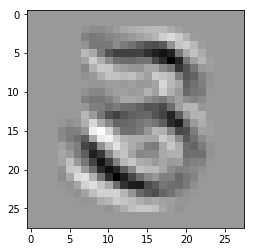

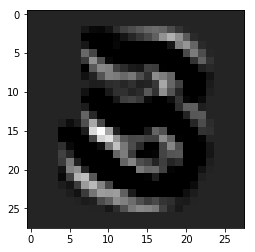

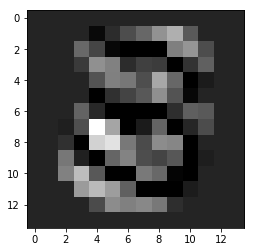

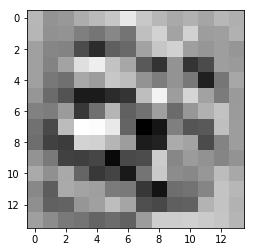

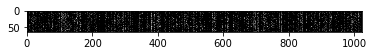

iter:  6900 train_cost:  0.0 train_acc:  1.0 test_cost:  217.45435 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


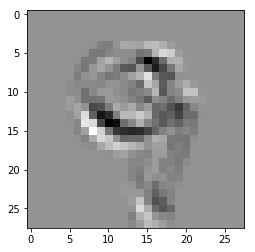

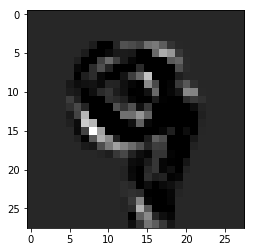

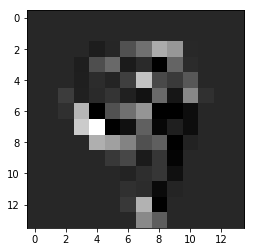

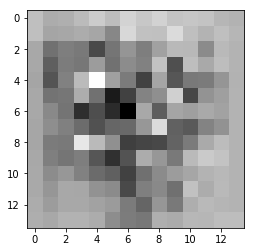

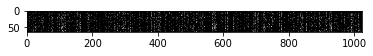

iter:  7000 train_cost:  13.556519 train_acc:  0.984375 test_cost:  137.2885 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


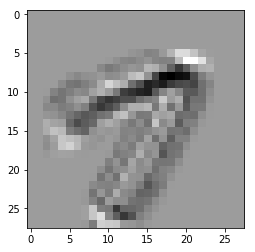

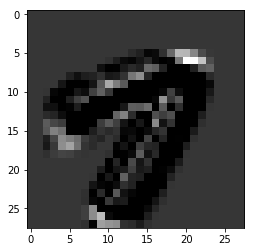

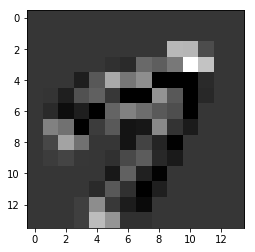

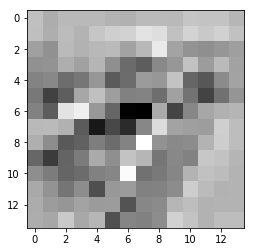

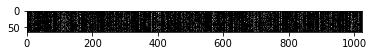

iter:  7100 train_cost:  0.0 train_acc:  1.0 test_cost:  54.23462 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


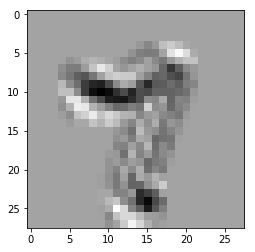

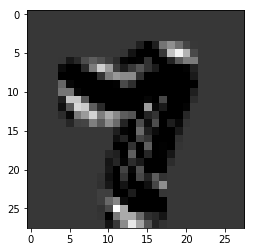

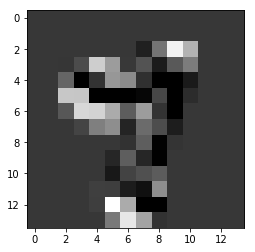

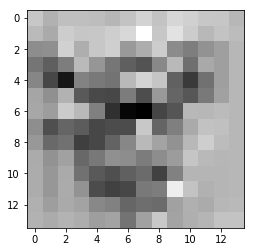

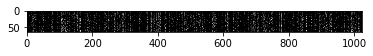

iter:  7200 train_cost:  0.0 train_acc:  1.0 test_cost:  46.09082 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


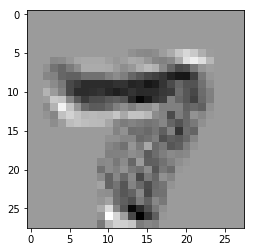

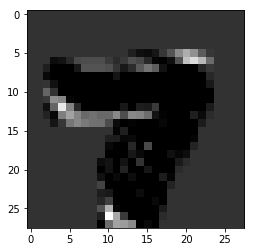

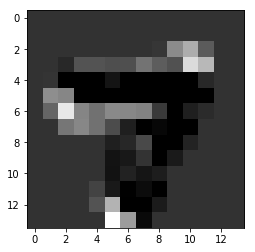

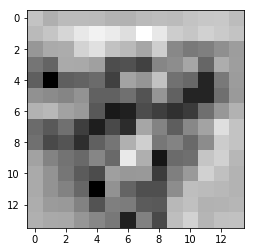

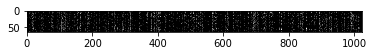

iter:  7300 train_cost:  0.0 train_acc:  1.0 test_cost:  29.368301 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


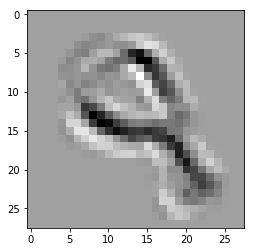

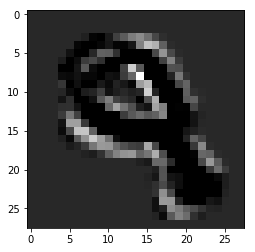

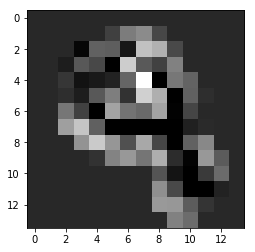

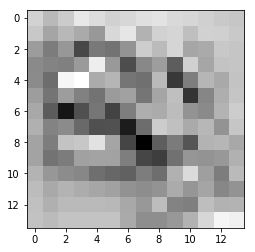

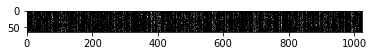

iter:  7400 train_cost:  0.0 train_acc:  1.0 test_cost:  15.812119 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


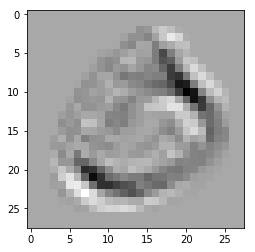

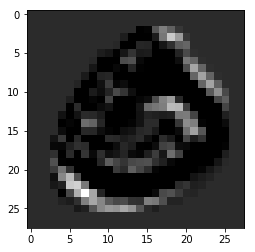

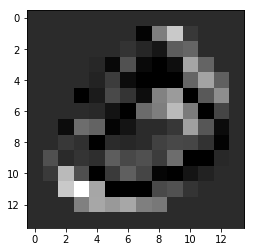

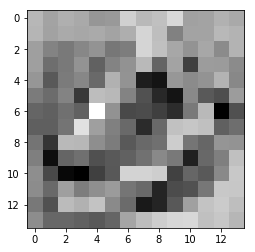

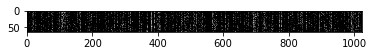

iter:  7500 train_cost:  0.0 train_acc:  1.0 test_cost:  35.96411 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


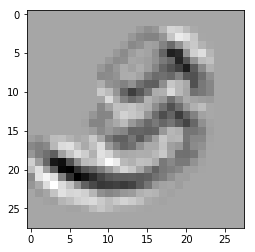

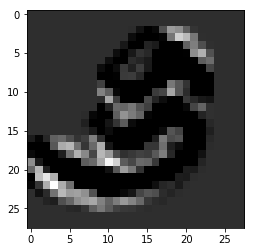

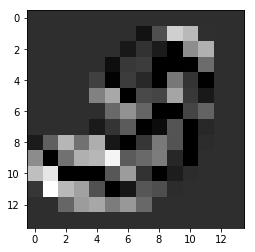

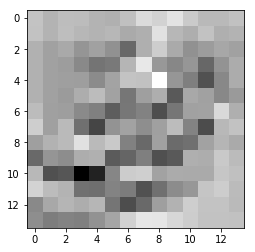

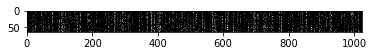

iter:  7600 train_cost:  0.0 train_acc:  1.0 test_cost:  32.082764 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


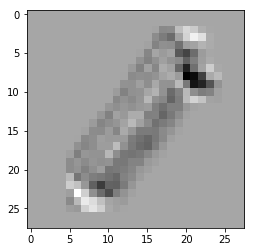

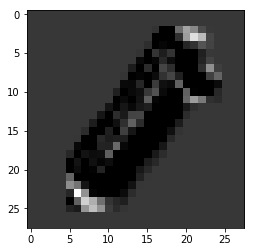

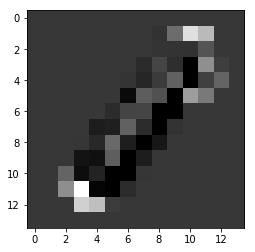

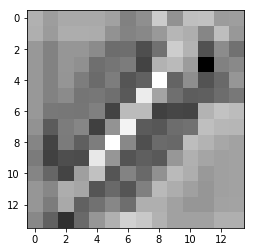

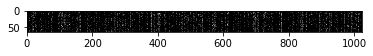

iter:  7700 train_cost:  0.0 train_acc:  1.0 test_cost:  159.13834 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


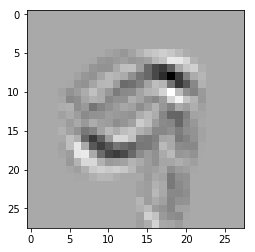

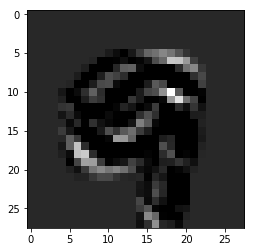

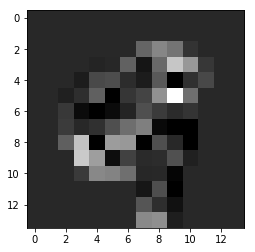

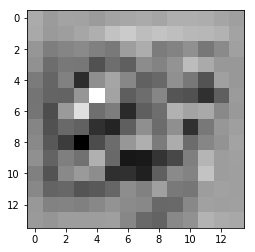

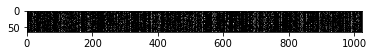

iter:  7800 train_cost:  0.0 train_acc:  1.0 test_cost:  100.763885 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


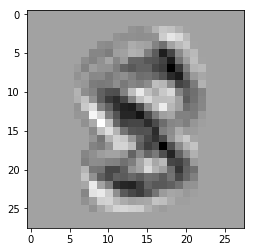

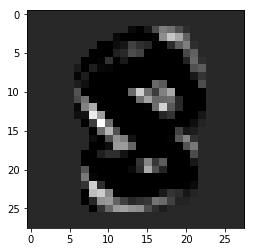

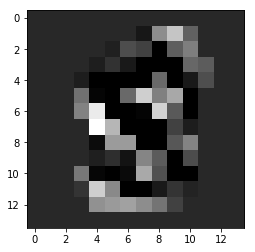

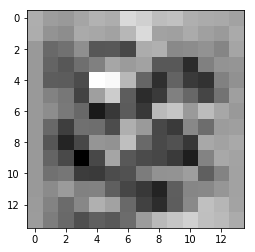

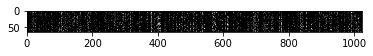

iter:  7900 train_cost:  0.0 train_acc:  1.0 test_cost:  68.05957 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


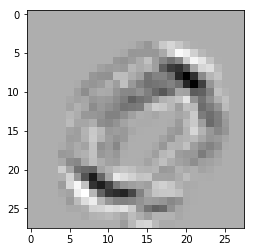

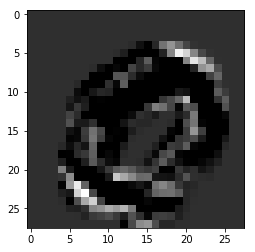

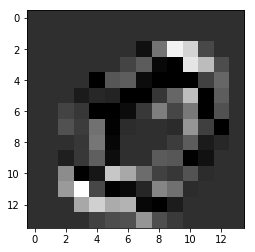

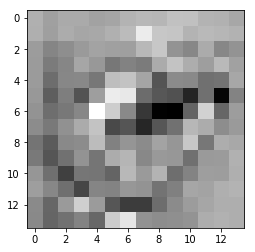

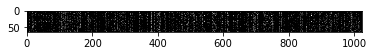

iter:  8000 train_cost:  0.0 train_acc:  1.0 test_cost:  23.688232 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


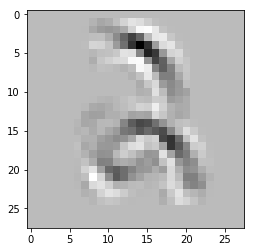

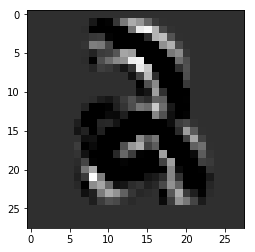

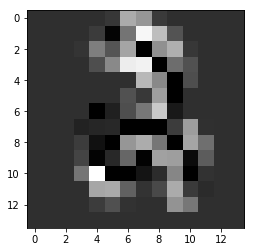

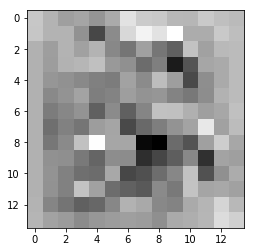

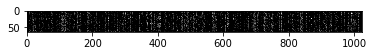

iter:  8100 train_cost:  0.0 train_acc:  1.0 test_cost:  425.2275 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


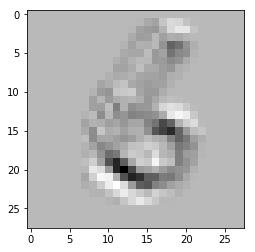

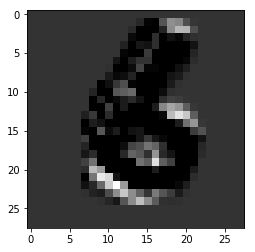

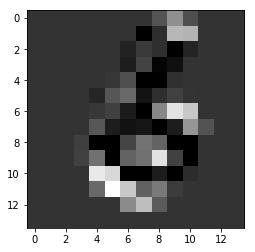

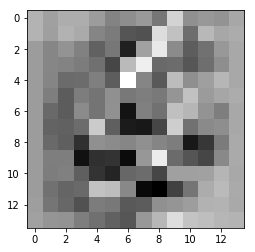

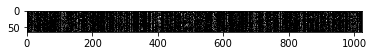

iter:  8200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


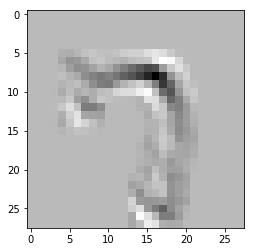

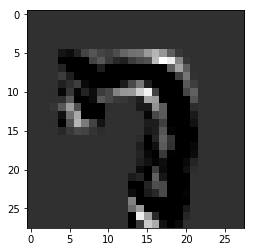

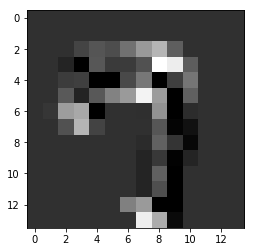

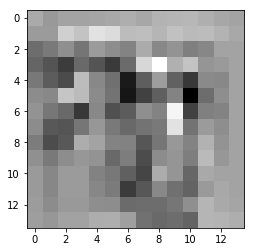

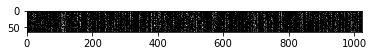

iter:  8300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


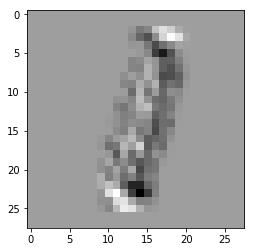

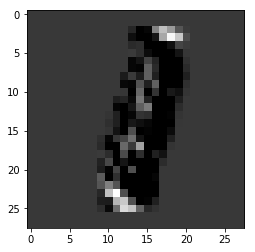

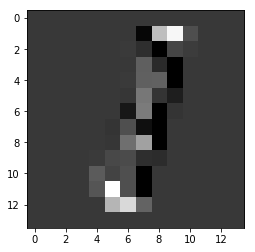

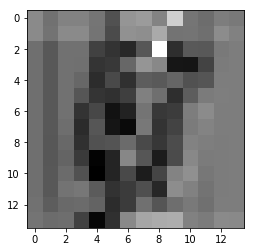

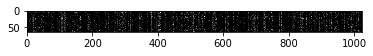

iter:  8400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


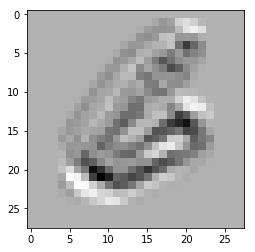

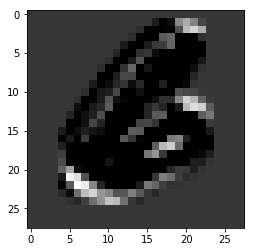

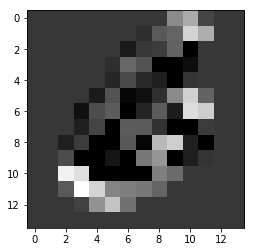

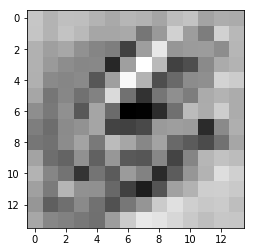

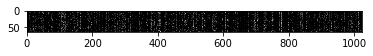

iter:  8500 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


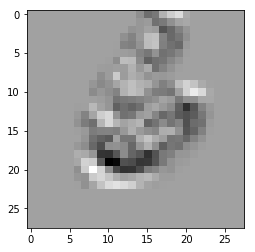

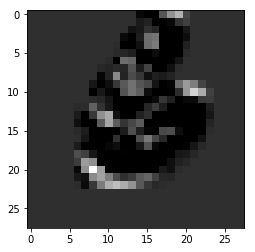

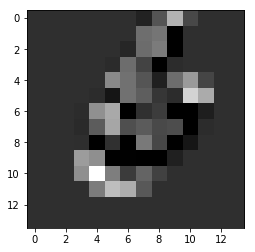

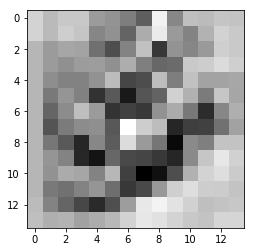

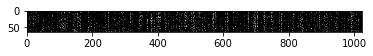

iter:  8600 train_cost:  0.0 train_acc:  1.0 test_cost:  204.29909 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


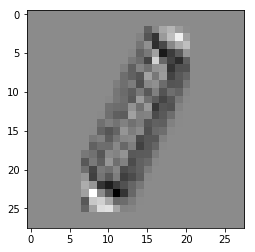

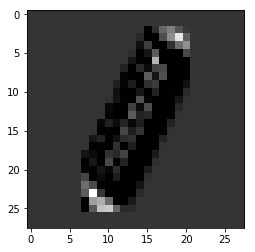

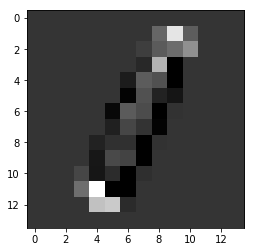

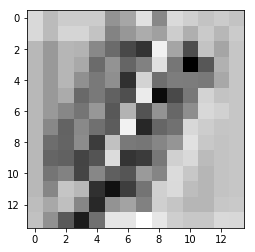

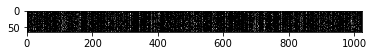

iter:  8700 train_cost:  145.39134 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


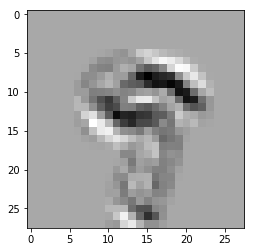

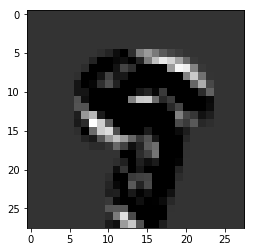

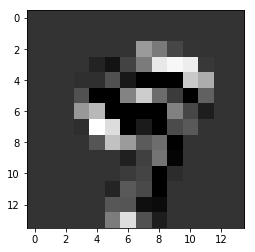

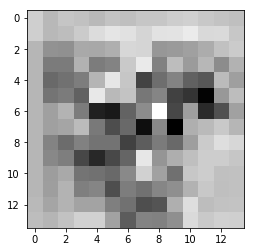

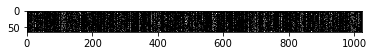

iter:  8800 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


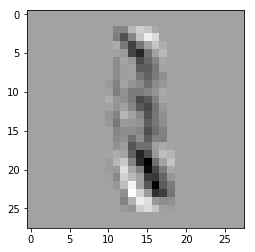

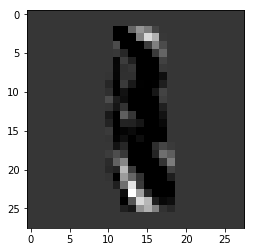

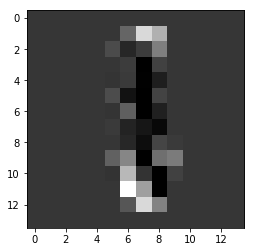

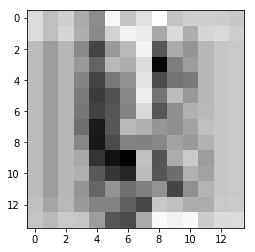

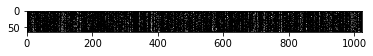

iter:  8900 train_cost:  0.0 train_acc:  1.0 test_cost:  180.01584 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


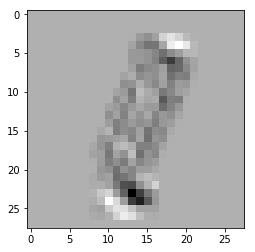

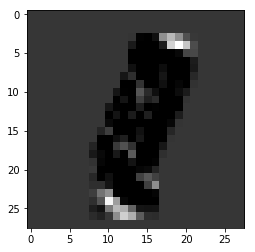

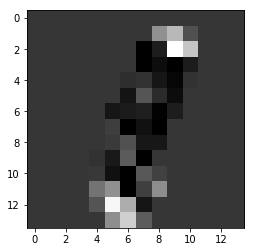

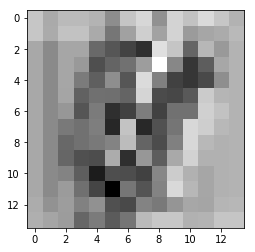

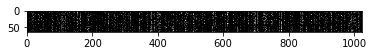

iter:  9000 train_cost:  0.0 train_acc:  1.0 test_cost:  11.95343 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


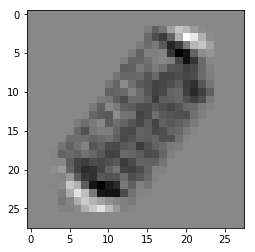

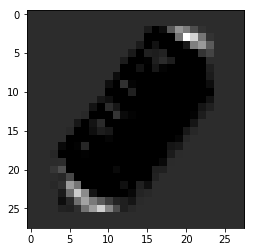

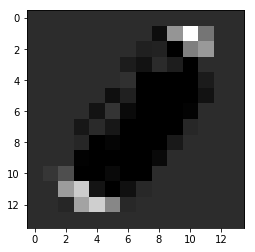

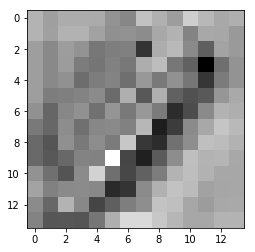

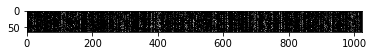

iter:  9100 train_cost:  0.0 train_acc:  1.0 test_cost:  112.992935 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


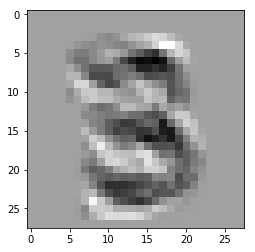

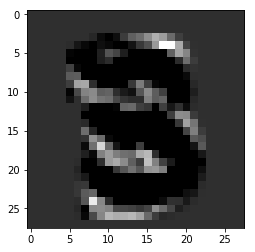

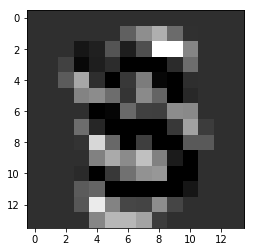

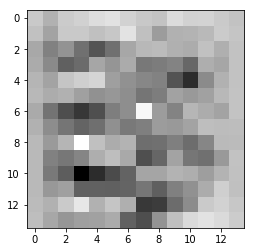

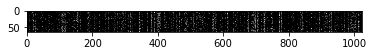

iter:  9200 train_cost:  11.0043335 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


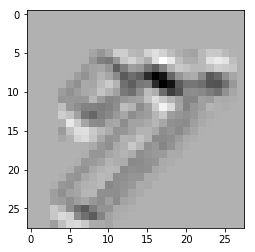

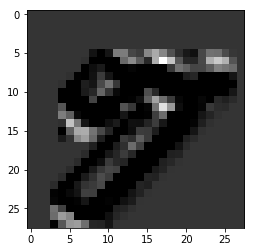

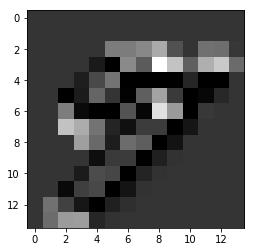

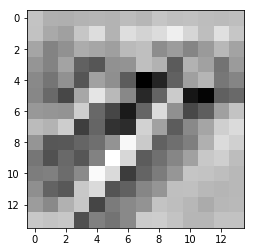

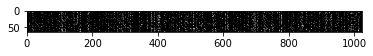

iter:  9300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


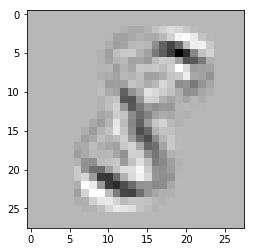

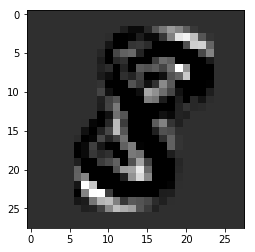

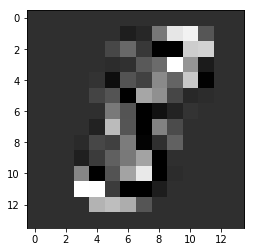

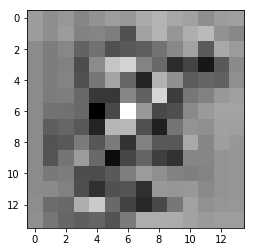

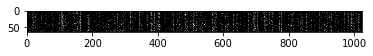

iter:  9400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


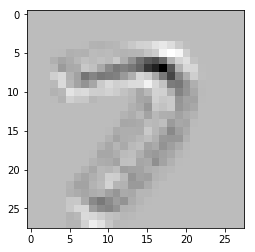

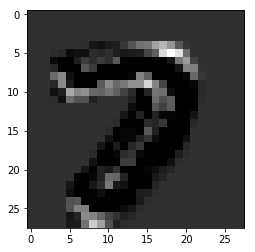

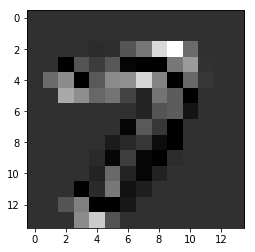

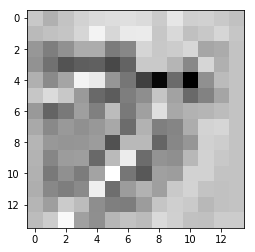

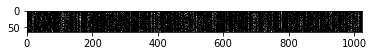

iter:  9500 train_cost:  0.0 train_acc:  1.0 test_cost:  54.08937 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


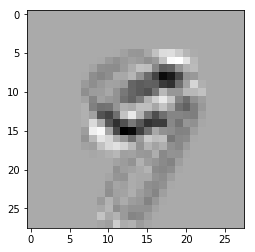

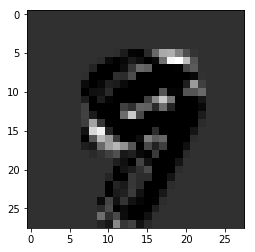

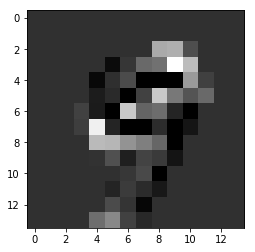

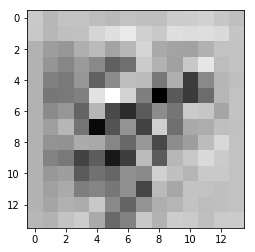

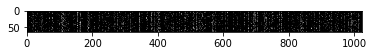

iter:  9600 train_cost:  0.0 train_acc:  1.0 test_cost:  199.87114 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


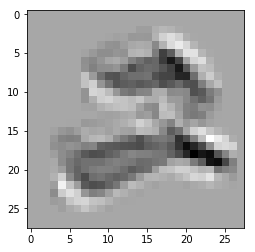

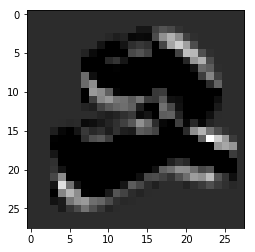

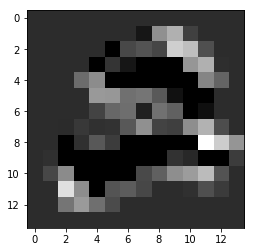

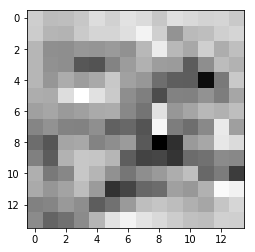

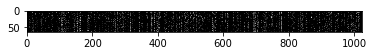

iter:  9700 train_cost:  0.0 train_acc:  1.0 test_cost:  104.95441 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


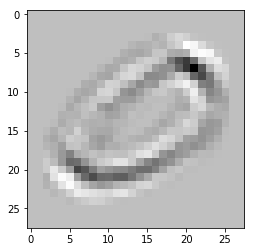

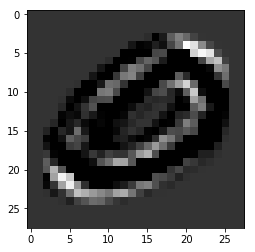

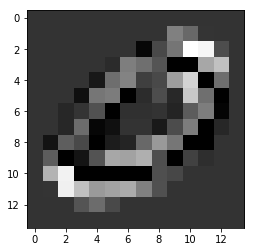

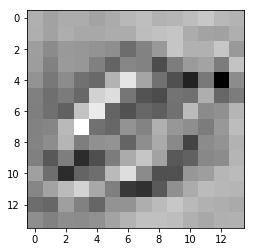

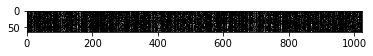

iter:  9800 train_cost:  0.0 train_acc:  1.0 test_cost:  163.38728 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


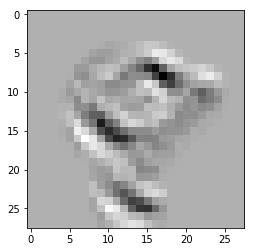

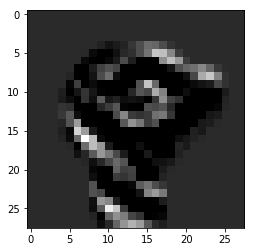

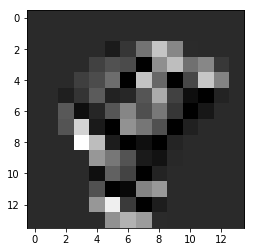

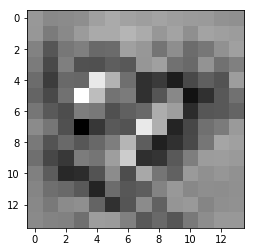

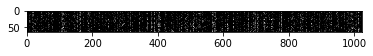

iter:  9900 train_cost:  0.0 train_acc:  1.0 test_cost:  89.14388 test_acc:  0.984375 num_of_returned_sensors: 7


NameError: ignored

In [15]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('accuracy'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
acc_summary = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()

saver = tf.train.Saver(biases)

# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log2/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log2/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([acc_summary,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([acc_summary,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        test_writer.add_summary(summary, i)
        
        if i % 1000 == 0:
          # Append the step number to the checkpoint name:
          saver.save(sess, './log2/model.ckpt', global_step=i)


        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    #print('predicted ', y_p_p)
    #print('real ', y_gr)